# 20210829 Initial Analysis

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.analysis import plot_redu
from imaka.reduce import util
from astropy.stats import sigma_clipped_stats
from importlib import reload

import imaka.analysis.moffat as moffat

## Edit Me
from imaka.reduce.nights import reduce_2021_08_29 as redu
night = '20210829'
fld = 'Fld2'

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
## Had an issue with stacking, the gfol

for key in list(redu.dict_images.keys()):
    for i in range(len(redu.dict_images[key])):
        img_num = redu.dict_images[key]
        suf = redu.dict_suffix[key]
        test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)
        
        stars = Table.read(root_dir + f'reduce/{fld}/' + test_img_base + '_clean_stars_stats_mdp.fits')
        print(f"key: {key} image {img_num[i]} stars: {len(stars)}")  

key: LS_I image 6 stars: 1623
key: LS_I image 7 stars: 2231
key: LS_I image 11 stars: 2963
key: LS_I image 15 stars: 3728
key: LS_I image 19 stars: 3649
key: LS_I image 23 stars: 3895
key: docz_I image 8 stars: 2272
key: docz_I image 12 stars: 3314
key: docz_I image 16 stars: 3568
key: docz_I image 20 stars: 3570
key: docz_I image 24 stars: 3873
key: open_I image 9 stars: 1238
key: open_I image 13 stars: 2129
key: open_I image 17 stars: 2174
key: open_I image 21 stars: 2141
key: open_I image 25 stars: 972
key: tt_I image 10 stars: 1666
key: tt_I image 14 stars: 2149
key: tt_I image 18 stars: 2481
key: tt_I image 22 stars: 2537
key: tt_I image 26 stars: 2468
key: LS_VBRI image 35 stars: 2156
key: LS_VBRI image 39 stars: 1712
key: LS_VBRI image 40 stars: 1861
key: LS_VBRI image 44 stars: 1867
key: docz_VBRI image 36 stars: 2021
key: docz_VBRI image 41 stars: 1806
key: docz_VBRI image 45 stars: 1996
key: open_VBRI image 37 stars: 1454
key: open_VBRI image 42 stars: 1460
key: open_VBRI ima

## Real time plots

In [4]:
redu.dict_images.keys()

dict_keys(['LS_I', 'docz_I', 'open_I', 'tt_I', 'LS_VBRI', 'docz_VBRI', 'open_VBRI', 'tt_VBRI', 'LS_RIVB', 'docz_RIVB', 'open_RIVB', 'tt_RIVB'])

In [45]:
# pick a file based on key
key = 'open_RIVB'
i=2
img_num = redu.dict_images[key]
suf = redu.dict_suffix[key]
test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)

#test_img_base = 'sta013LS_c_scan'

50% EE radius = 0.600"


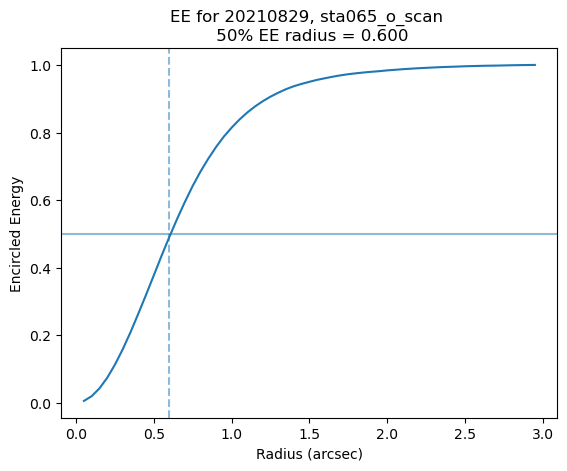

In [50]:
plot_redu.plot_ee_50(test_img_base, root_dir, fld, night)

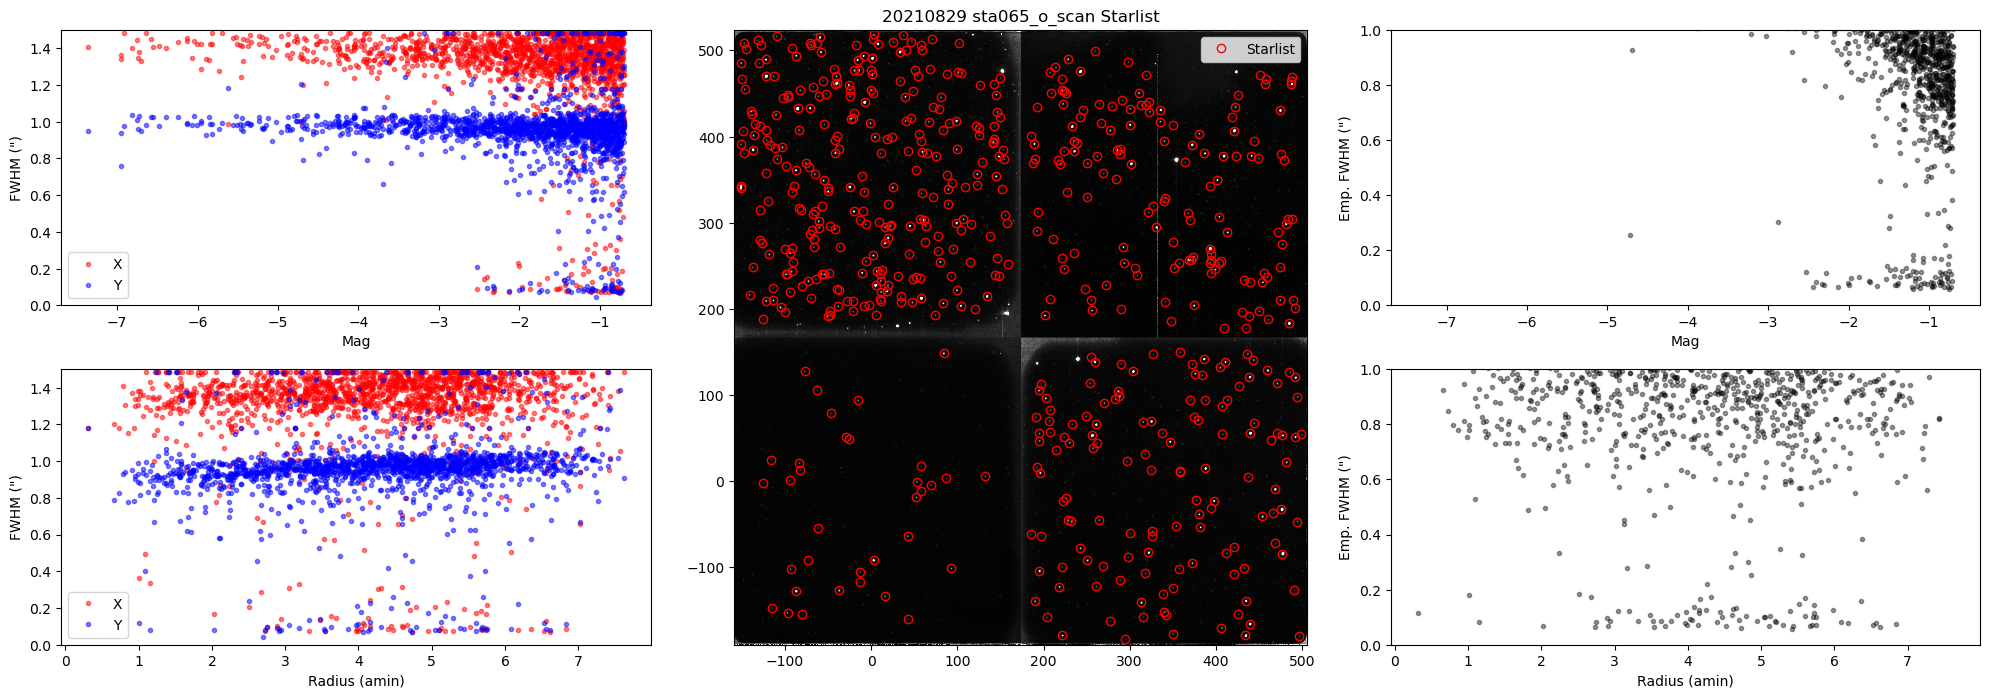

x: fwhm_x_avg = 1.37" fwhm_x_med = 1.38" fwhm_x_std = 0.08"
x: fwhm_x_avg = 1.37" fwhm_x_med = 1.38" fwhm_x_std = 0.08"


In [47]:
plot_redu.plot_starlist_stats(test_img_base, root_dir, fld, night)

Play with a star list and look at trends in FWHM, etc. 

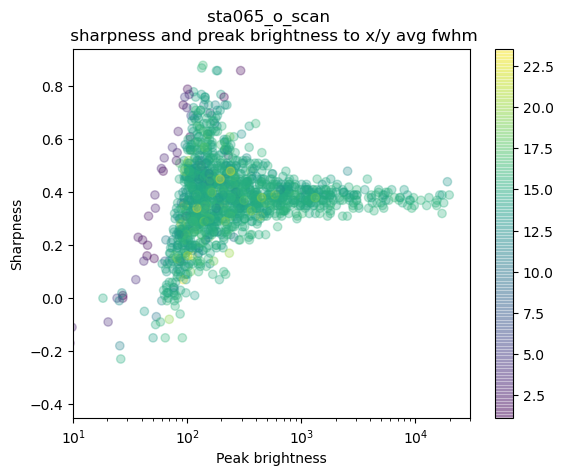

In [49]:
# num pix vs fwhm
plt.scatter(stars['peak'], stars['sharpness'], c=np.average([stars['x_fwhm'], stars['y_fwhm']], axis=0), alpha=0.3)
plt.xlim(10, 30000)
plt.xscale('log')
plt.xlabel("Peak brightness")
plt.ylabel("Sharpness")
plt.title(test_img_base+ " \n sharpness and preak brightness to x/y avg fwhm")
plt.colorbar()

# STATS

## Moffat stats

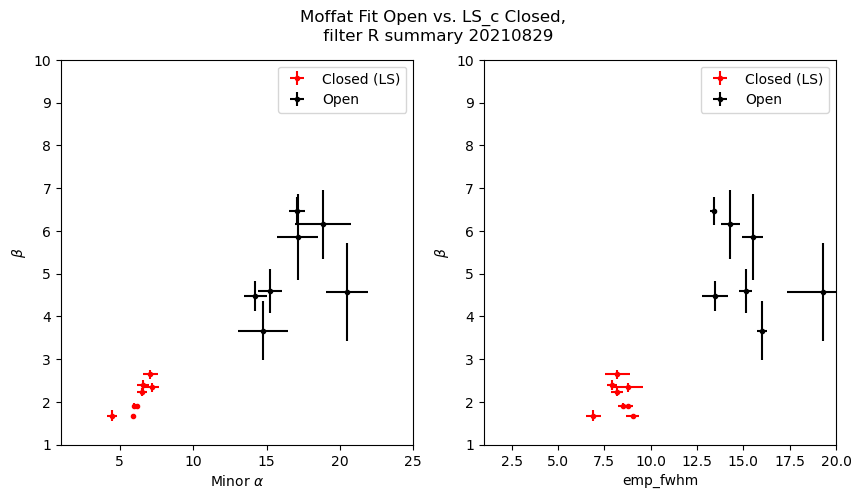

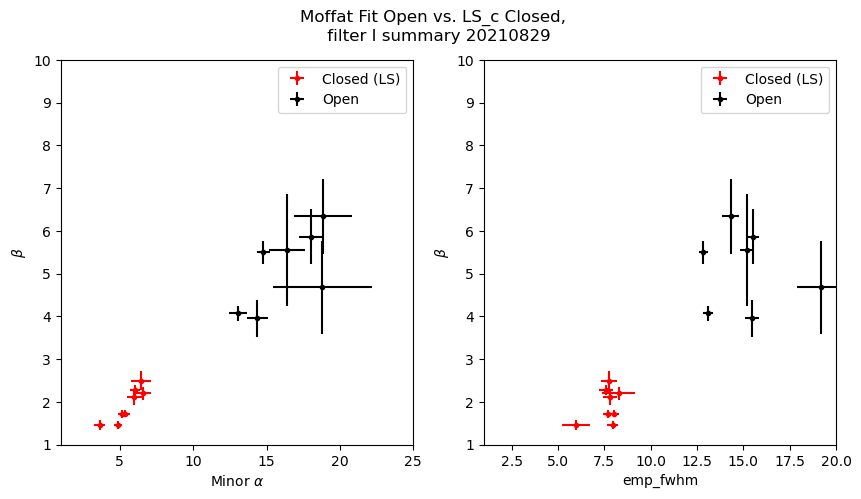

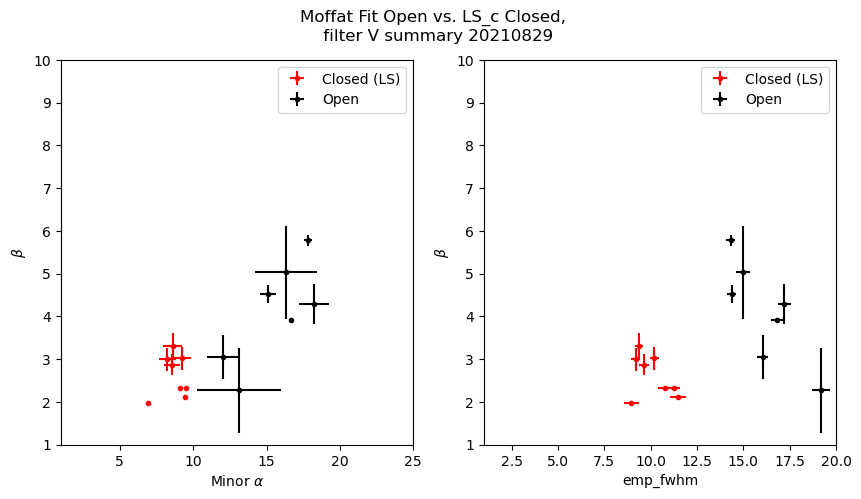

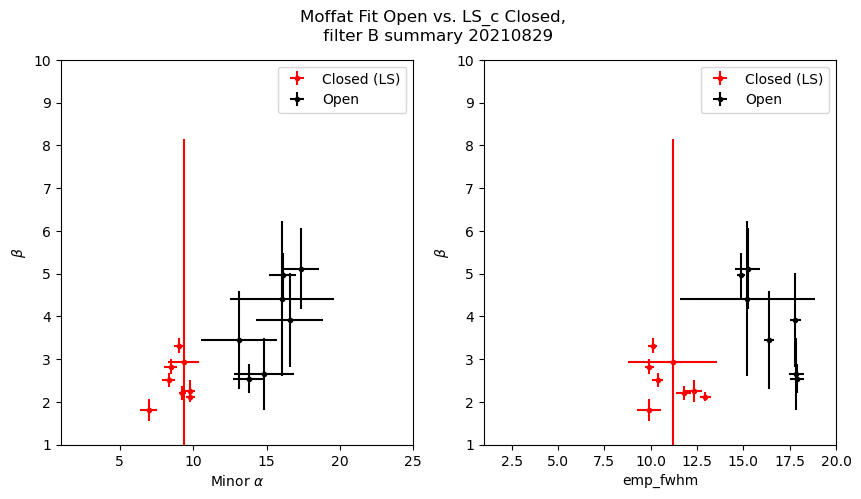

In [38]:
c_key = "LS_c"
plot_redu.plot_moffat_fit_4F("R", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("I", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("V", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("B", root_dir, c_key, fld, night)

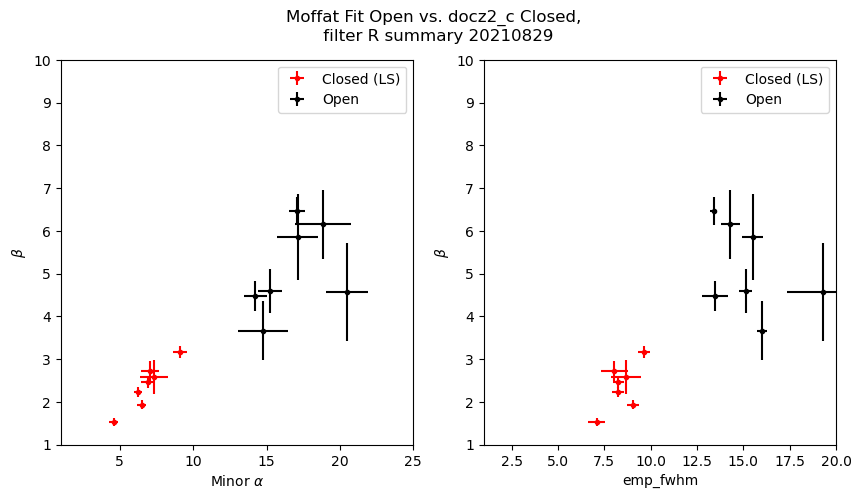

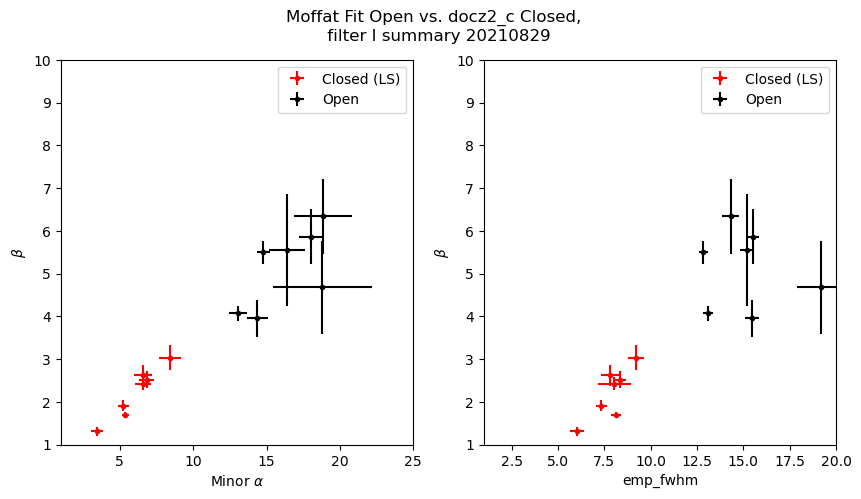

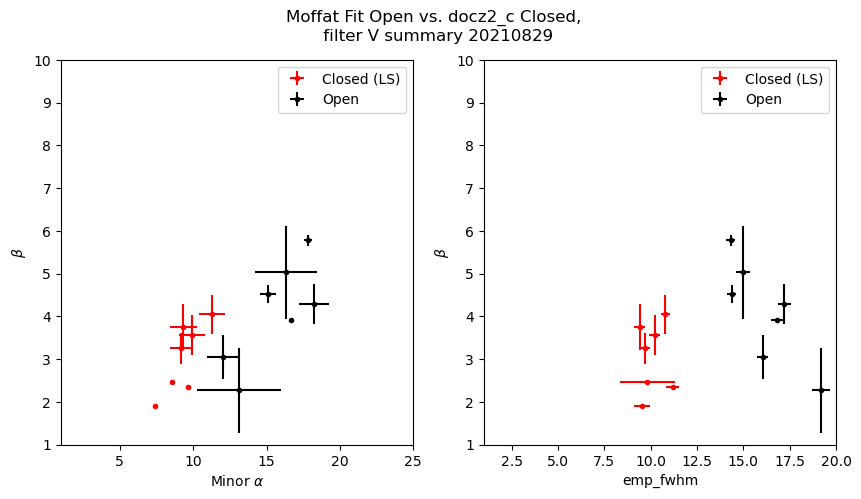

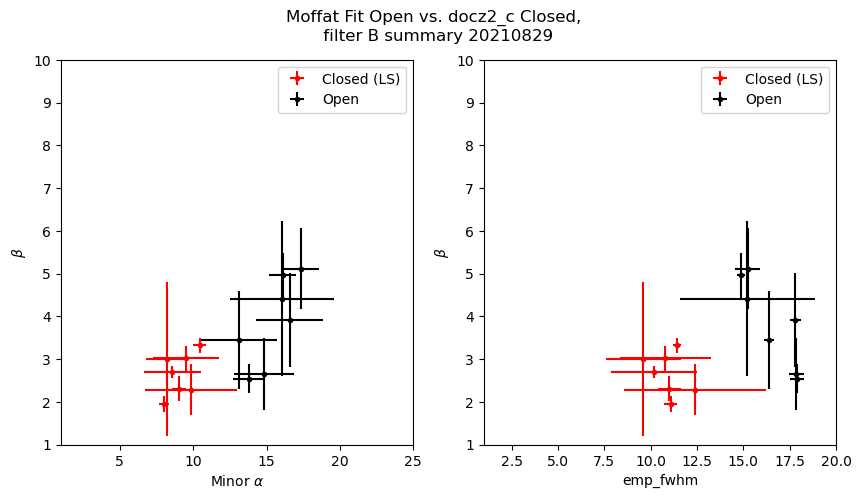

In [39]:
c_key = "docz2_c"
plot_redu.plot_moffat_fit_4F("R", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("I", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("V", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("B", root_dir, c_key, fld, night)

### Beta vs. Mag on Stacks

Text(0.5, 0.98, 'Moffat Fit Open vs.Closed, \n 20210829 STACK for LS_c filter order RIVB')

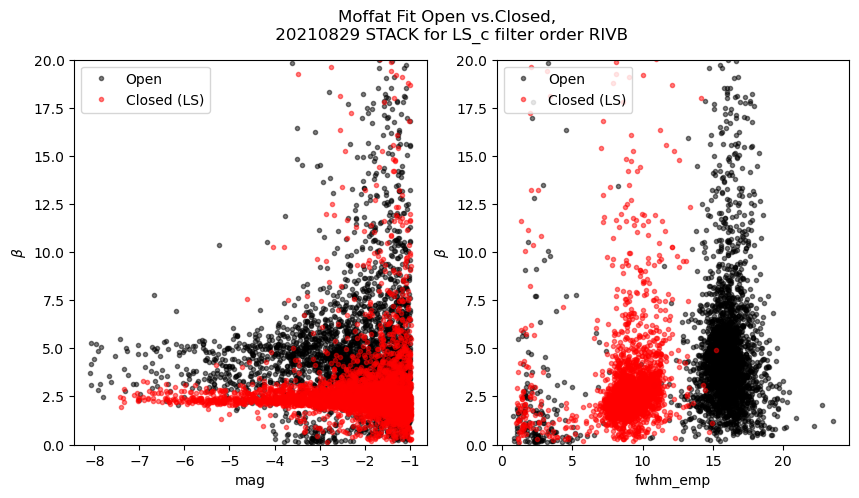

In [33]:
# Stacked image moffat fit values
c_key = "LS_c"
filt_key = "RIVB"
stats_c = Table.read(f'{root_dir}reduce/stacks/fld2_stack_{c_key}_{filt_key}_stars_stats_mdp.fits')
stats_o = Table.read(f'{root_dir}reduce/stacks/fld2_stack__o_{filt_key}_stars_stats_mdp.fits')

plt.figure(figsize=(10,5))
plt.clf()
plt.subplot(121)
plt.errorbar(stats_o['mag'], stats_o['Beta'],  fmt='k.', label='Open', alpha=0.5)
plt.errorbar(stats_c['mag'], stats_c['Beta'],  fmt='r.', label='Closed (LS)', alpha=0.5)
plt.xlabel(r'mag')
plt.ylabel(r'$\beta$')
plt.ylim(0,20)
plt.legend()

plt.subplot(122)
plt.errorbar(stats_o['fwhm_emp'], stats_o['Beta'], fmt='k.', label='Open', alpha=0.5)
plt.errorbar(stats_c['fwhm_emp'], stats_c['Beta'],  fmt='r.', label='Closed (LS)', alpha=0.5)

plt.xlabel(r'fwhm_emp')
plt.ylabel(r'$\beta$')
plt.legend()
plt.ylim(0,20)

plt.suptitle(f"Moffat Fit Open vs.Closed, \n {night} STACK for {c_key} filter order {filt_key}")

[]

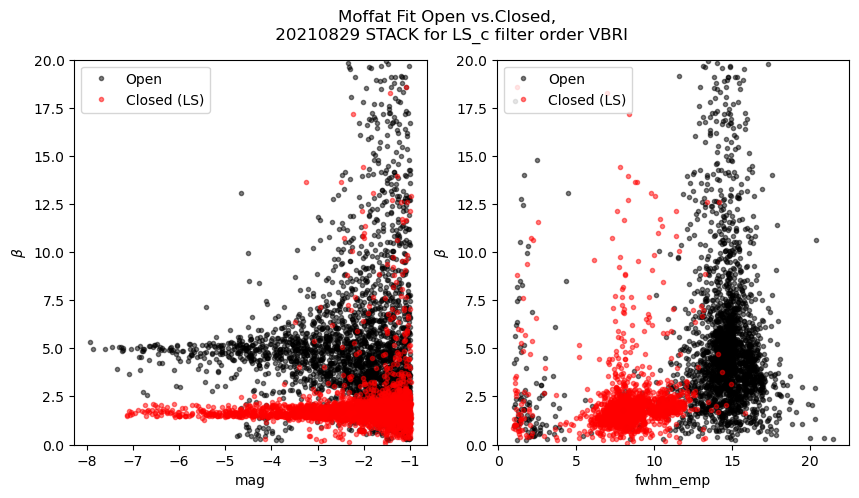

In [34]:
# Stacked image moffat fit values
c_key = "LS_c"
filt_key = "VBRI"
stats_c = Table.read(f'{root_dir}reduce/stacks/fld2_stack_{c_key}_{filt_key}_stars_stats_mdp.fits')
stats_o = Table.read(f'{root_dir}reduce/stacks/fld2_stack__o_{filt_key}_stars_stats_mdp.fits')

plt.figure(figsize=(10,5))
plt.clf()
plt.subplot(121)
plt.errorbar(stats_o['mag'], stats_o['Beta'],  fmt='k.', label='Open', alpha=0.5)
plt.errorbar(stats_c['mag'], stats_c['Beta'],  fmt='r.', label='Closed (LS)', alpha=0.5)
plt.xlabel(r'mag')
plt.ylabel(r'$\beta$')
plt.ylim(0,20)
plt.legend()

plt.subplot(122)
plt.errorbar(stats_o['fwhm_emp'], stats_o['Beta'], fmt='k.', label='Open', alpha=0.5)
plt.errorbar(stats_c['fwhm_emp'], stats_c['Beta'],  fmt='r.', label='Closed (LS)', alpha=0.5)

plt.xlabel(r'fwhm_emp')
plt.ylabel(r'$\beta$')
plt.legend()
plt.ylim(0,20)

plt.suptitle(f"Moffat Fit Open vs.Closed, \n {night} STACK for {c_key} filter order {filt_key}")
plt.plot()

In [22]:
Table.read(f'{root_dir}reduce/stacks/fld2_stack__o_RIVB_V_RIVB_stars_stats_mdp.fits')

<Table length=688>
  id  xcentroid ycentroid ...     Minor Alpha        Major Alpha    
int64  float64   float64  ...       float64            float64      
----- --------- --------- ... ------------------- ------------------
   40  9483.922    62.707 ...   23.52507961570916  38.14593222870052
   44 10374.618    64.393 ...   11.97014542119607 18.148488840756514
   52  9109.365     71.66 ...  20.673516643892132 31.070759477582154
   62   8527.23    77.026 ...  15.971438205911344 22.718208907042843
   68  7512.718    84.544 ...  0.3037380134666469 0.9267405800387105
   74  5776.608    87.901 ...  14.812668573262776  22.19014672786975
   76  7199.597    91.132 ...  17.442172449307655 27.084792290334466
   77  5727.366     94.66 ...  11.061072041756766 15.275961103907807
   79  9156.569    96.557 ...   20.37531231454072 31.319569624851734
   83  8946.531    99.046 ...    14.3550123371441 21.319452795728928
  ...       ...       ... ...                 ...                ...
 3107   8107.77  5014.385 ...    18.4185660239118 24.724175935326166
 3124   8203.28  5022.681 ...  11.607456707041491 15.285887266593786
 3127  7874.301  5023.324 ...   10.84029659908187 15.207116436719547
 3151   8286.26  5033.707 ... -1.4068887147070157  6.123083967206408
 3186  8050.438  5046.319 ...  22.842384827005198  28.75581363872846
 3188  7183.635  5047.757 ...  21.882774035558263 29.332979844187992
 3255  9616.112  5074.111 ...   8.134703587420539  9.576219454970198
 3273   8270.25  5077.104 ...  18.671846192149243  24.76415721994416
 3274  9723.829  5077.123 ...  38.016353824578935  51.83283710989816
 3311    9094.4  5087.255 ...  11.414025045570021 14.816873373845072

## Beta vs. FWHM for wavelength

[]

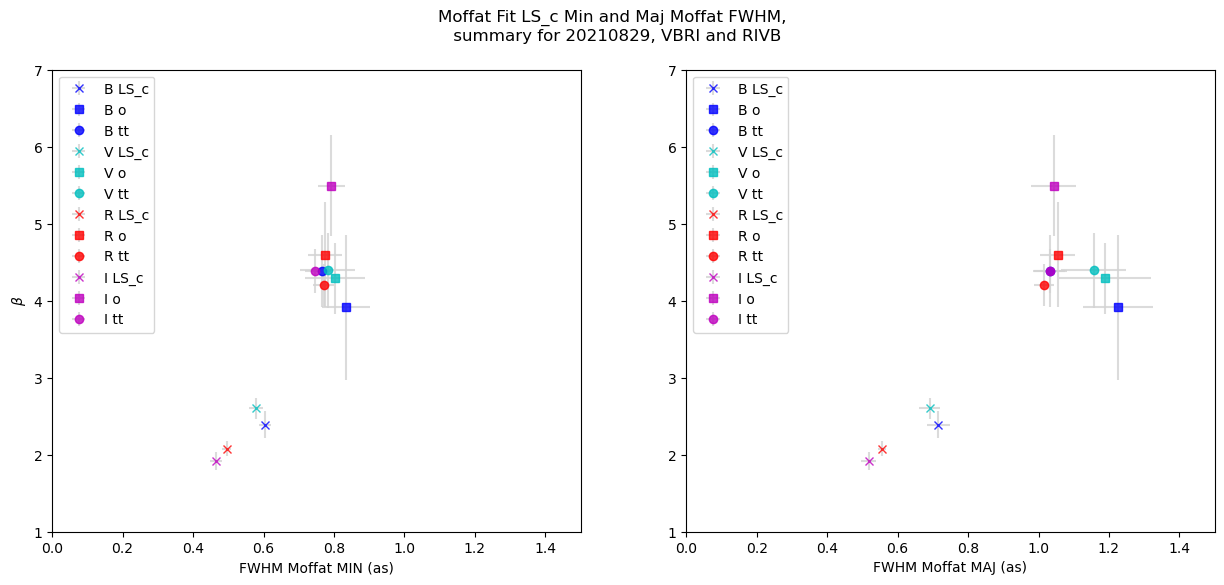

In [56]:
# outlier rejection for all filters
c_key = "LS_c"
filters = ["B", "V", "R", "I"]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,6))
dict_filt = {"B":"b", "V":"c", "R":"r", "I":"m"}
f_key = [c_key, "o", "tt"]
f_fmt = ["x", "s", "o"]

# iterate through filters
for fil_band in filters:
    f_closed = f'{root_dir}reduce/stats/stats_{c_key}_{fil_band}_mdp.fits'
    f_open = f'{root_dir}reduce/stats/stats__o_{fil_band}_mdp.fits'
    f_tt = f'{root_dir}reduce/stats/stats_tt_c_{fil_band}_mdp.fits'
    
    files = [f_closed, f_open, f_tt]

    # TODO: outlier rejection
    #pt2
    
    for e, stat_f in enumerate(files):
        stats = Table.read(stat_f)
        FWHM_min, sig_FWHM_min, FWHM_maj, sig_FWHM_maj = moffat.calc_mof_fwhm(stat_f, filt=False, plate_scale=stats.meta['SCALE'])
        ax[0].errorbar(np.median(FWHM_min), np.median(stats['Beta']), xerr=np.median(sig_FWHM_min), yerr=np.median(stats['Beta std']), fmt=dict_filt[fil_band]+f_fmt[e], label=f"{fil_band} {f_key[e]}", ecolor='lightgray', alpha = 0.8)
        ax[1].errorbar(np.median(FWHM_maj), np.median(stats['Beta']), xerr=np.median(sig_FWHM_maj), yerr=np.median(stats['Beta std']), fmt=dict_filt[fil_band]+f_fmt[e], label=f"{fil_band} {f_key[e]}", ecolor='lightgray', alpha = 0.8)
    
    
ax[0].set_xlabel(r'FWHM Moffat MIN (as)')
ax[1].set_xlabel(r'FWHM Moffat MAJ (as)')
ax[0].set_ylabel(r'$\beta$')

ax[1].set_ylim(1, 7)    
ax[0].set_ylim(1, 7)

ax[1].set_xlim(0, 1.5)    
ax[0].set_xlim(0, 1.5)

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

plt.suptitle(f"Moffat Fit {c_key} Min and Maj Moffat FWHM, \n summary for {night}, VBRI and RIVB")
plt.plot()

[]

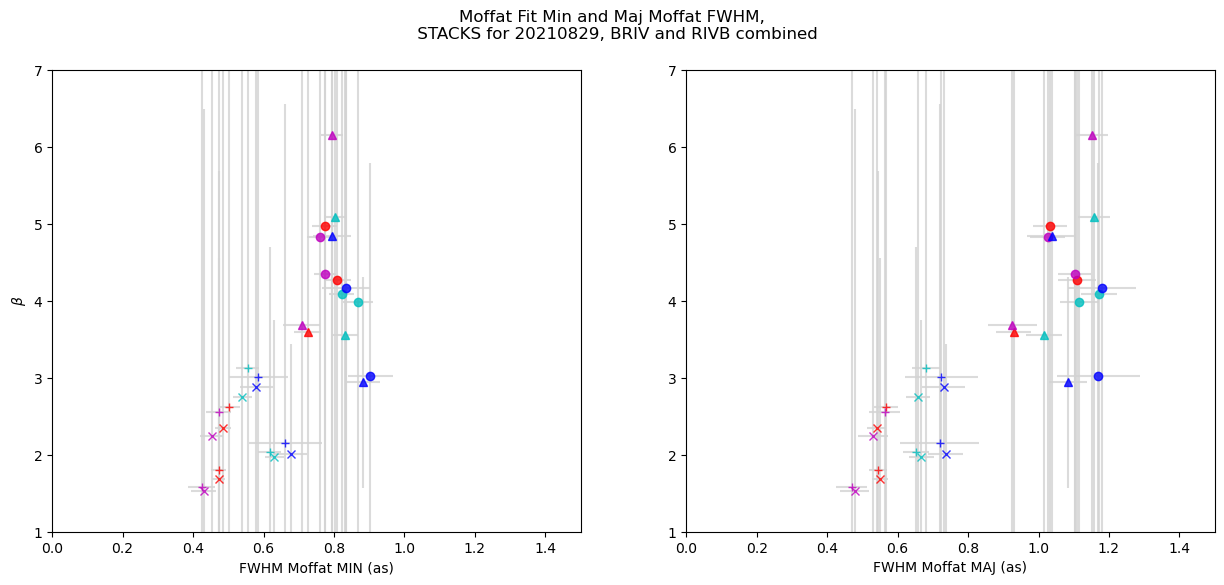

In [16]:
# pulling the same data but now from the stacked images

# outlier rejection for all filters
filters = ["B", "V", "R", "I"]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,6))
dict_filt = {"B":"b", "V":"c", "R":"r", "I":"m"}
f_fmt = {"_o":'o', 'LS_c':'x', 'docz2_c':'+', 'tt_c':'^'}

stats_stacked = Table.read(redu.stats_dir + 'stats_stacks.fits')
#stats_stacked_mdp = Table.read(redu.stats_dir + 'stats_stacks_mdp.fits')
status = ["_".join(img.split("_")[-3:-1]) for img in stats_stacked["Image"]]
labels = [stats_stacked["FILTER"][i]+status[i] for i in range(len(status))]

FWHM_min, sig_FWHM_min, FWHM_maj, sig_FWHM_maj = moffat.calc_mof_fwhm_data(stats_stacked, filt=False, plate_scale=stats_stacked.meta['SCALE'])

for i in range(len(status)):
    ax[0].errorbar(FWHM_min[i], stats_stacked['Beta'][i], xerr=sig_FWHM_min[i], yerr=stats_stacked['Beta std'][i], fmt=dict_filt[stats_stacked["FILTER"][i]]+f_fmt[status[i]], ecolor='lightgray', alpha = 0.8)
    ax[1].errorbar(FWHM_maj[i], stats_stacked['Beta'][i], xerr=sig_FWHM_maj[i], yerr=stats_stacked['Beta std'][i], fmt=dict_filt[stats_stacked["FILTER"][i]]+f_fmt[status[i]], ecolor='lightgray', alpha = 0.8)
    
ax[0].set_xlabel(r'FWHM Moffat MIN (as)')
ax[1].set_xlabel(r'FWHM Moffat MAJ (as)')
ax[0].set_ylabel(r'$\beta$')

ax[1].set_ylim(1, 7)    
ax[0].set_ylim(1, 7)

ax[1].set_xlim(0, 1.5)    
ax[0].set_xlim(0, 1.5)

#ax[0].legend(loc='upper left')
#ax[1].legend(loc='upper left')

plt.suptitle(f"Moffat Fit Min and Maj Moffat FWHM, \n STACKS for {night}, BRIV and RIVB combined")
plt.plot()

### Jitter: Difference between MIN and MAJ
Here we look at the impact of jitter by comparing major and minor axes

[]

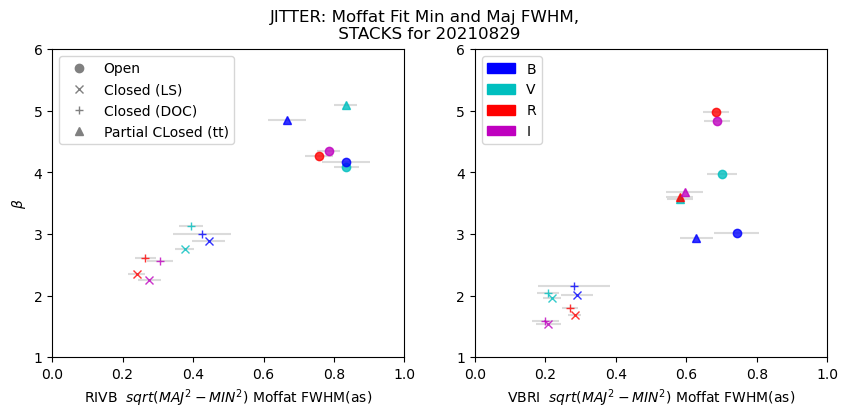

In [42]:
# outlier rejection for all filters
filters = ["B", "V", "R", "I"]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
dict_filt = {"B":"b", "V":"c", "R":"r", "I":"m"}
f_fmt = {"_o":'o', 'LS_c':'x', 'docz2_c':'+', 'tt_c':'^'}
f_fmt_name = { "Open":'o', 'Closed (LS)':'x', 'Closed (DOC)':'+', 'Partial CLosed (tt)':'^'}


stats_stacked = Table.read(redu.stats_dir + 'stats_stacks.fits')
f_ord = [img.split("_")[-1].split(".")[0] for img in stats_stacked['Image']]
orders = np.unique(f_ord).tolist()

status = ["_".join(img.split("_")[-3:-1]) for img in stats_stacked["Image"]]
labels = [stats_stacked["FILTER"][i]+status[i] for i in range(len(status))]
fmts_use = [dict_filt[stats_stacked["FILTER"][i]]+f_fmt[status[i]] for i in range(len(status))]

FWHM_min, sig_FWHM_min, FWHM_maj, sig_FWHM_maj = moffat.calc_mof_fwhm_data(stats_stacked, filt=False, plate_scale=stats_stacked.meta['SCALE'])

for i in range(len(status)):
    index = orders.index(f_ord[i])
    ax[index].errorbar(np.sqrt(FWHM_maj[i]**2 - FWHM_min[i]**2), stats_stacked['Beta'][i], xerr=sig_FWHM_min[i], fmt=dict_filt[stats_stacked["FILTER"][i]]+f_fmt[status[i]], ecolor='lightgray', alpha = 0.8)
    
ax[0].set_xlabel(f'{orders[0]}  $sqrt(MAJ^2 - MIN^2)$ Moffat FWHM(as)')
ax[1].set_xlabel(f'{orders[1]}  $sqrt(MAJ^2 - MIN^2)$ Moffat FWHM(as)')
ax[0].set_ylabel(r'$\beta$')

import matplotlib.lines as mlines
import matplotlib.patches as mpatches
ax[0].legend(handles=[mlines.Line2D([0], [0], marker=value, label=key, color='grey',  lw=0) for key, value in f_fmt_name.items()])
ax[1].legend(handles=[mpatches.Patch(color=value, label=key) for key, value in dict_filt.items()], loc=2)
 
ax[0].set_ylim(1, 6)
ax[1].set_ylim(1, 6) 

ax[0].set_xlim(0, 1)
ax[1].set_xlim(0, 1)    

plt.suptitle(f"JITTER: Moffat Fit Min and Maj FWHM, \n STACKS for {night}")
plt.plot()

### FA vs. FWHM
Here we want to know how the seperation from center affects FWHM from the stacked image starlists. 

[]

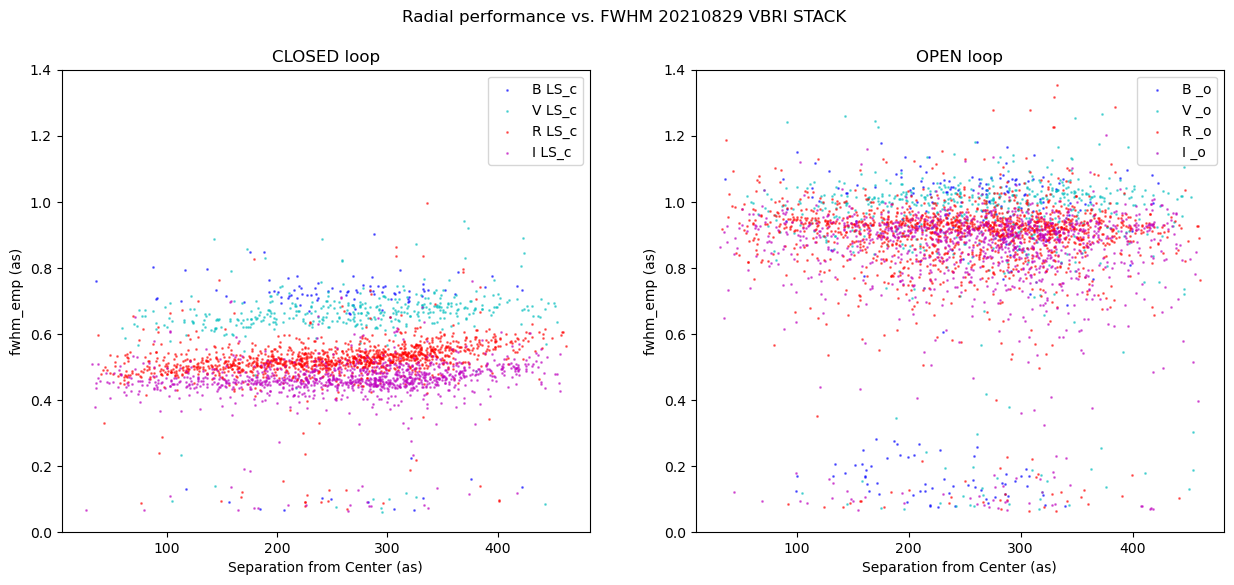

In [37]:
c_key = 'LS_c'
o_key = '_o'
odr ='VBRI'
width = 10560
dict_filt = {"B":"b", "V":"c", "R":"r", "I":"m"}

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,6))

for filt in dict_filt.keys():
    stats_stacked_c_mdp = f'{redu.stacks_dir}fld2_stack_{c_key}_{odr}_{filt}_{odr}_stars_stats_mdp.fits'
    stats_stacked_o_mdp = f'{redu.stacks_dir}fld2_stack_{o_key}_{odr}_{filt}_{odr}_stars_stats.fits'
    stats_c = Table.read(stats_stacked_c_mdp)
    stats_o = Table.read(stats_stacked_o_mdp)

    stats_c['FA'] = np.sqrt( (stats_c['xcentroid']-width/2)**2 + (stats_c['ycentroid']-width/2)**2 )*stats_c.meta['SCALE']
    stats_o['FA'] = np.sqrt( (stats_o['xcentroid']-width/2)**2 + (stats_o['ycentroid']-width/2)**2 )*stats_o.meta['SCALE']
    #FWHM_min, sig_FWHM_min, FWHM_maj, sig_FWHM_maj = moffat.calc_mof_fwhm(stats_stacked_c, filt=False, plate_scale=stats.meta['SCALE'])

    ax[0].scatter(stats_c['FA'], stats_c['fwhm_emp']*stats_c.meta['SCALE'], c=dict_filt[filt], label = f'{filt} {c_key}', alpha = 0.5, s = 1)
    ax[1].scatter(stats_o['FA'], stats_o['fwhm_emp']*stats_c.meta['SCALE'], c=dict_filt[filt], label = f'{filt} {o_key}', alpha = 0.5, s = 1)

ax[0].legend()
ax[1].legend()
ax[1].set_ylim(0, 1.4)    
ax[0].set_ylim(0, 1.4)

ax[0].set_xlabel(r'Separation from Center (as)')
ax[1].set_xlabel(r'Separation from Center (as)')

ax[0].set_ylabel(r'fwhm_emp (as)')
ax[1].set_ylabel(r'fwhm_emp (as)')

ax[0].set_title('CLOSED loop')
ax[1].set_title('OPEN loop')

plt.suptitle(f'Radial performance vs. FWHM {night} {odr} STACK')
plt.plot()

[]

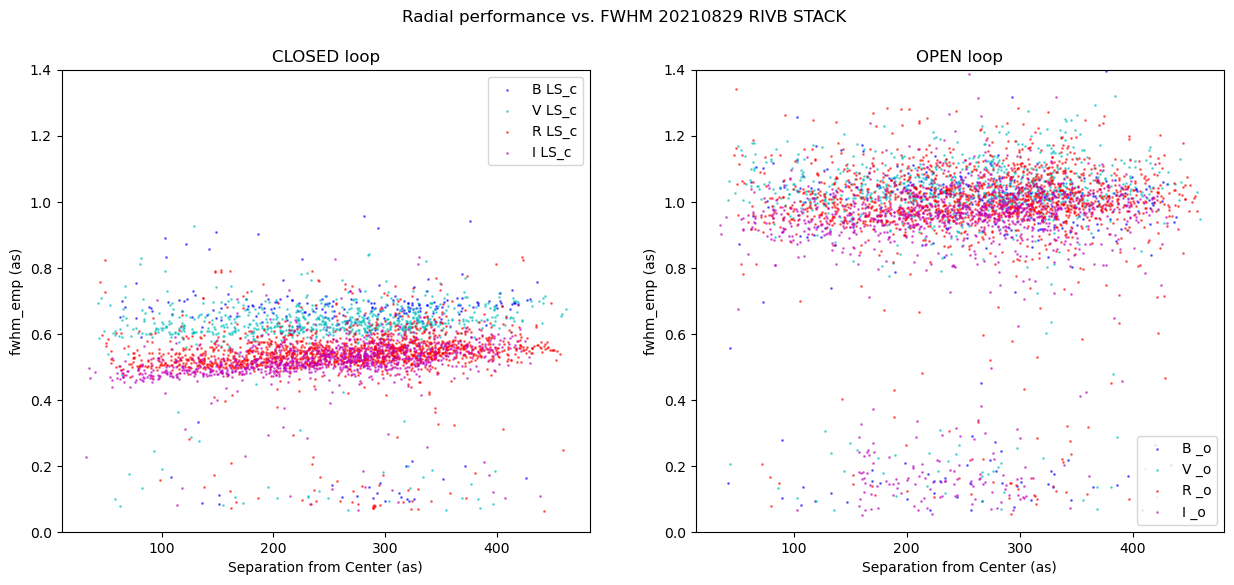

In [36]:
c_key = 'LS_c'
o_key = '_o'
odr ='RIVB'
width = 10560
dict_filt = {"B":"b", "V":"c", "R":"r", "I":"m"}

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,6))

for filt in dict_filt.keys():
    stats_stacked_c_mdp = f'{redu.stacks_dir}fld2_stack_{c_key}_{odr}_{filt}_{odr}_stars_stats_mdp.fits'
    stats_stacked_o_mdp = f'{redu.stacks_dir}fld2_stack_{o_key}_{odr}_{filt}_{odr}_stars_stats.fits'
    stats_c = Table.read(stats_stacked_c_mdp)
    stats_o = Table.read(stats_stacked_o_mdp)

    stats_c['FA'] = np.sqrt( (stats_c['xcentroid']-width/2)**2 + (stats_c['ycentroid']-width/2)**2 )*stats_c.meta['SCALE']
    stats_o['FA'] = np.sqrt( (stats_o['xcentroid']-width/2)**2 + (stats_o['ycentroid']-width/2)**2 )*stats_o.meta['SCALE']
    #FWHM_min, sig_FWHM_min, FWHM_maj, sig_FWHM_maj = moffat.calc_mof_fwhm(stats_stacked_c, filt=False, plate_scale=stats.meta['SCALE'])

    ax[0].scatter(stats_c['FA'], stats_c['fwhm_emp']*stats_c.meta['SCALE'], c=dict_filt[filt], label = f'{filt} {c_key}', alpha = 0.5, s = 1)
    ax[1].scatter(stats_o['FA'], stats_o['fwhm_emp']*stats_c.meta['SCALE'], c=dict_filt[filt], label = f'{filt} {o_key}', alpha = 0.5, s = 1)

ax[0].legend()
ax[1].legend()
ax[1].set_ylim(0, 1.4)    
ax[0].set_ylim(0, 1.4)

ax[0].set_xlabel(r'Separation from Center (as)')
ax[1].set_xlabel(r'Separation from Center (as)')

ax[0].set_ylabel(r'fwhm_emp (as)')
ax[1].set_ylabel(r'fwhm_emp (as)')

ax[0].set_title('CLOSED loop')
ax[1].set_title('OPEN loop')

plt.suptitle(f'Radial performance vs. FWHM {night} {odr} STACK')
plt.plot()

## Stat Stacking

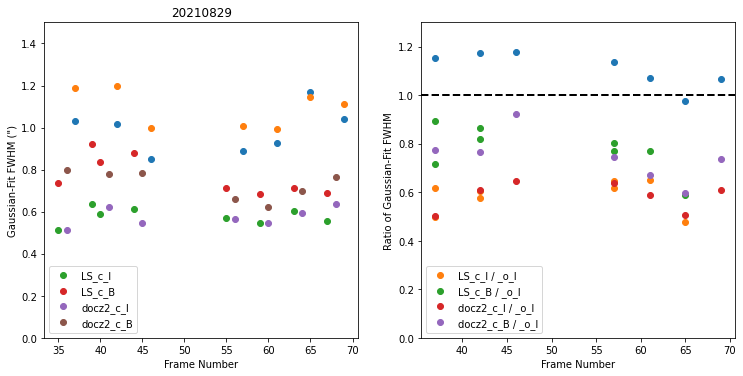

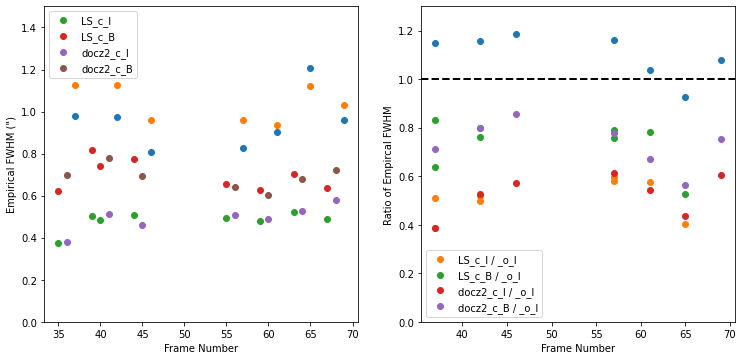

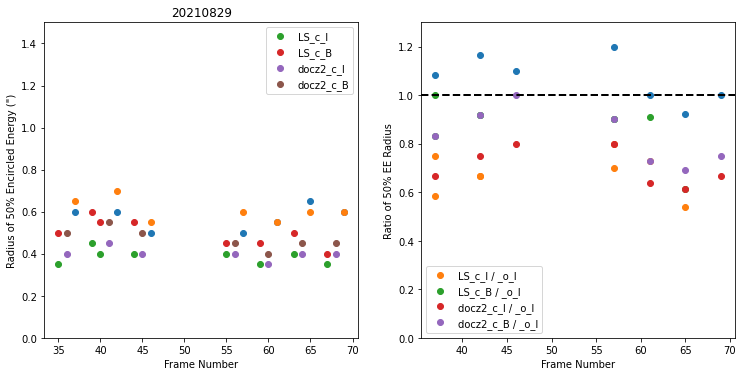

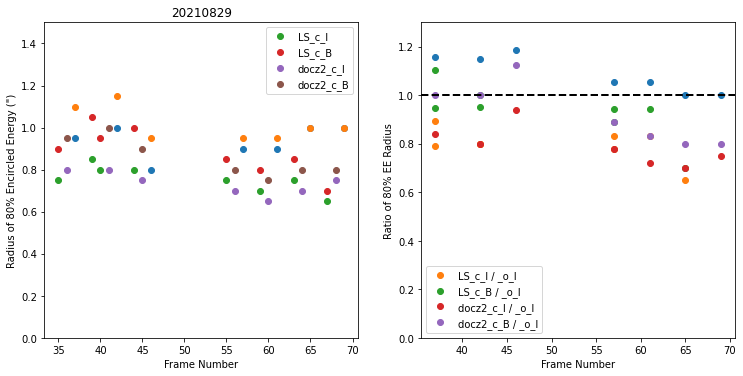

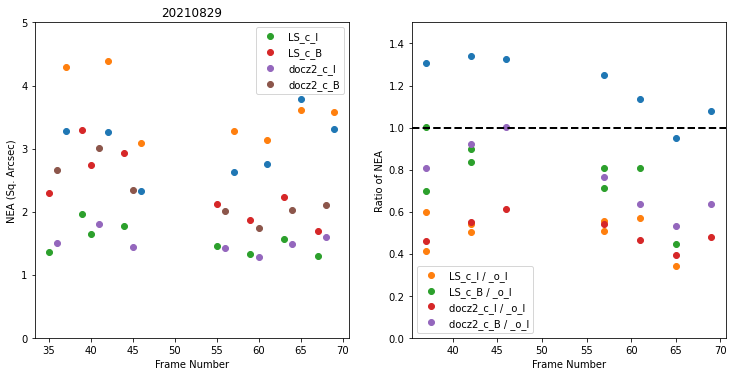

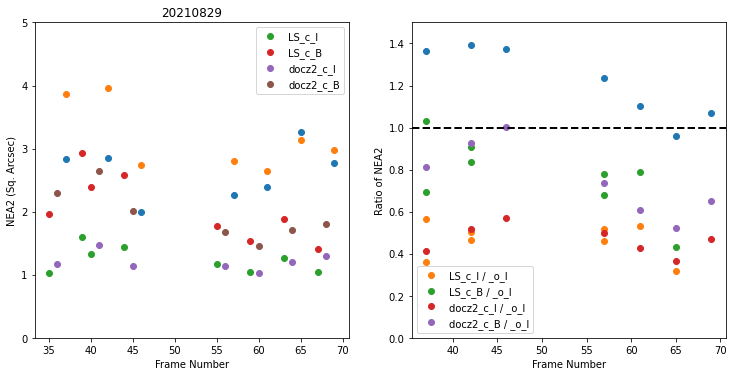

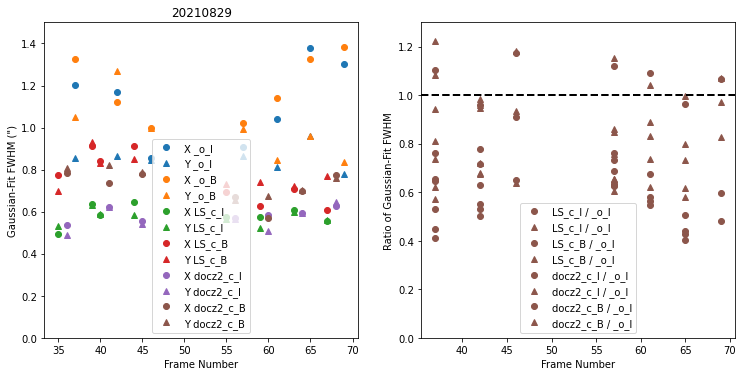

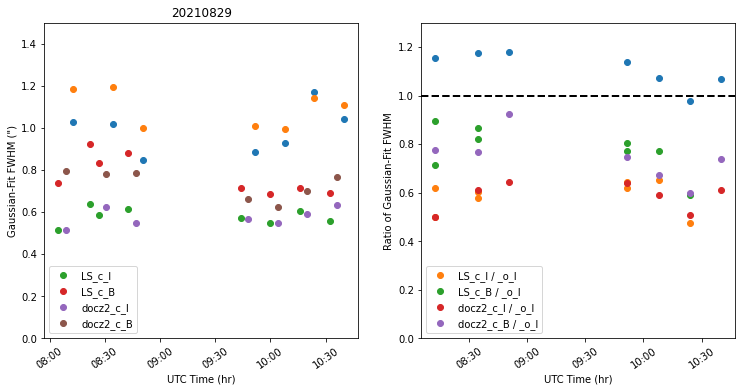

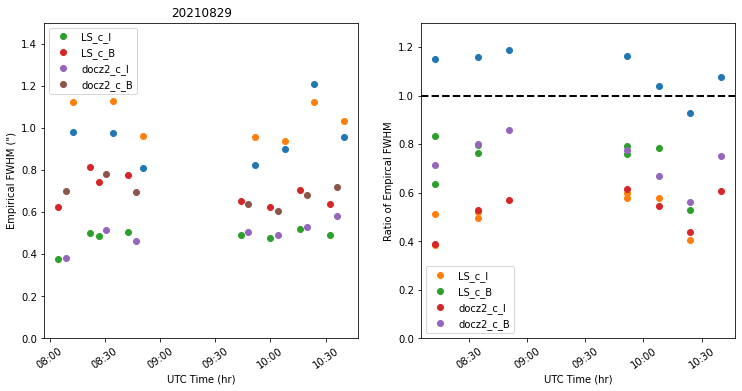

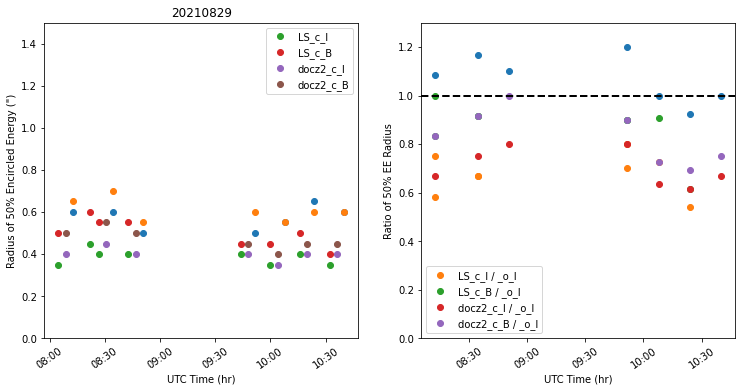

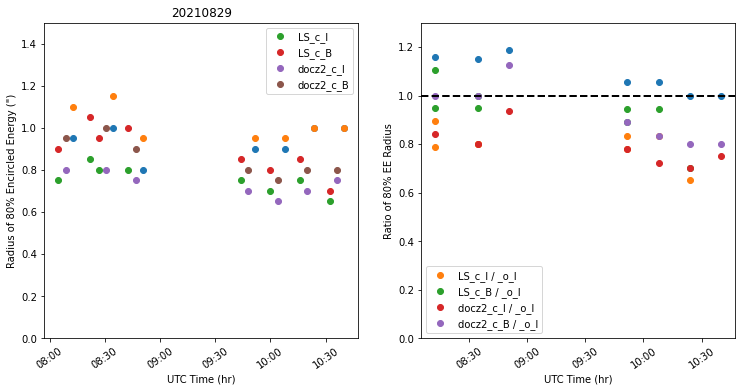

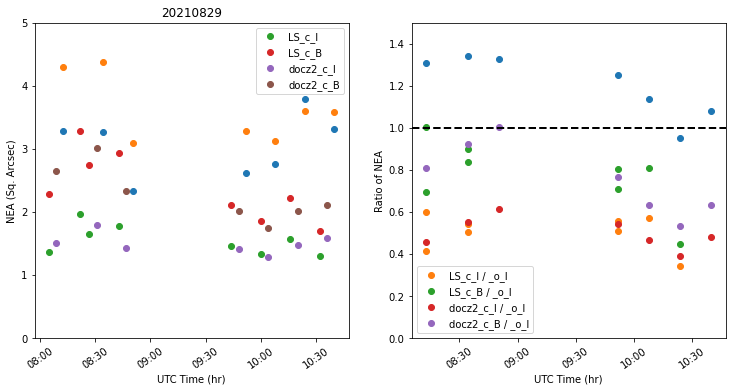

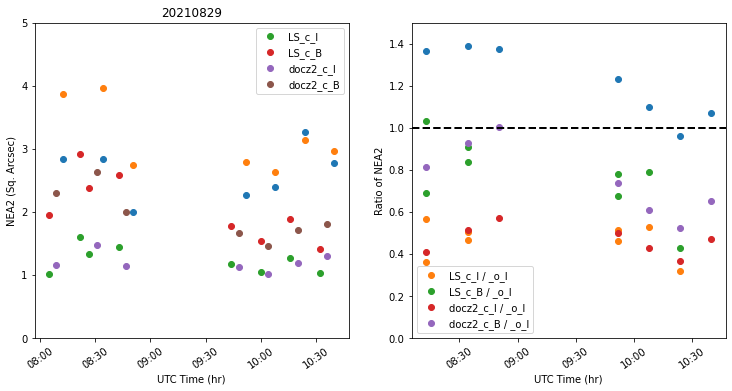

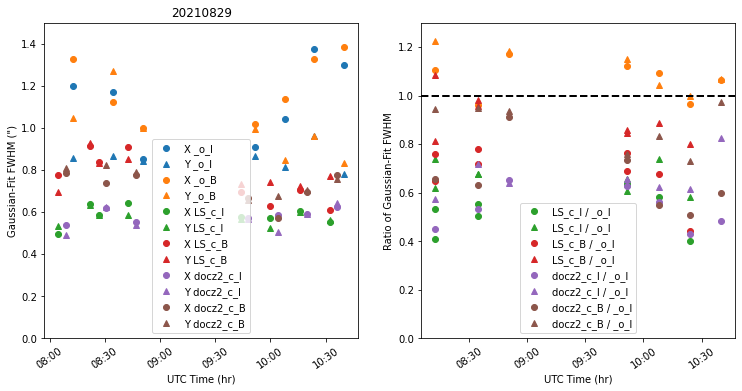

In [18]:
## Must have completed stats
suffixes = list(redu.dict_suffix.keys())
suffixes = ['_o_I', '_o_B', 'LS_c_I', 'LS_c_B', 'docz2_c_I', 'docz2_c_B']
plot_stats.plot_stack_stats(night, suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')
plt.show()

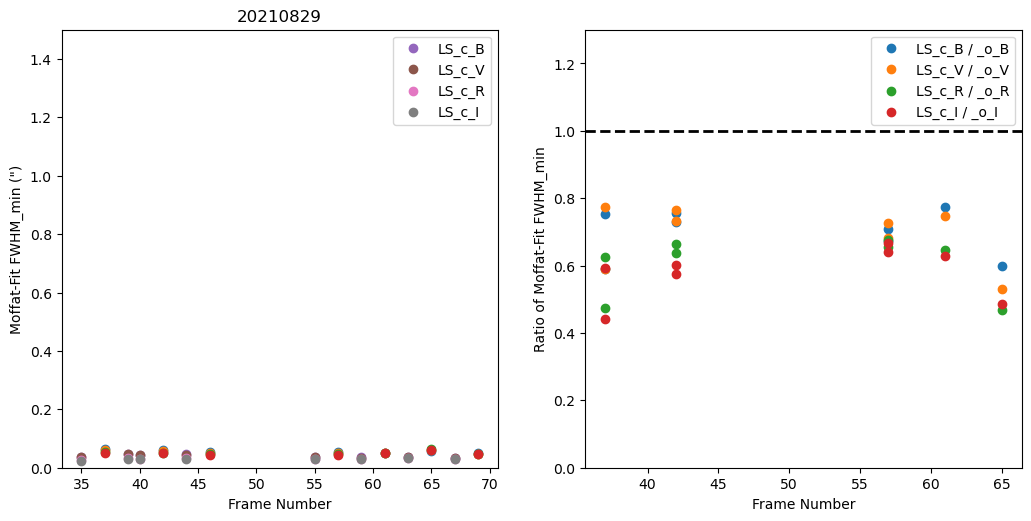

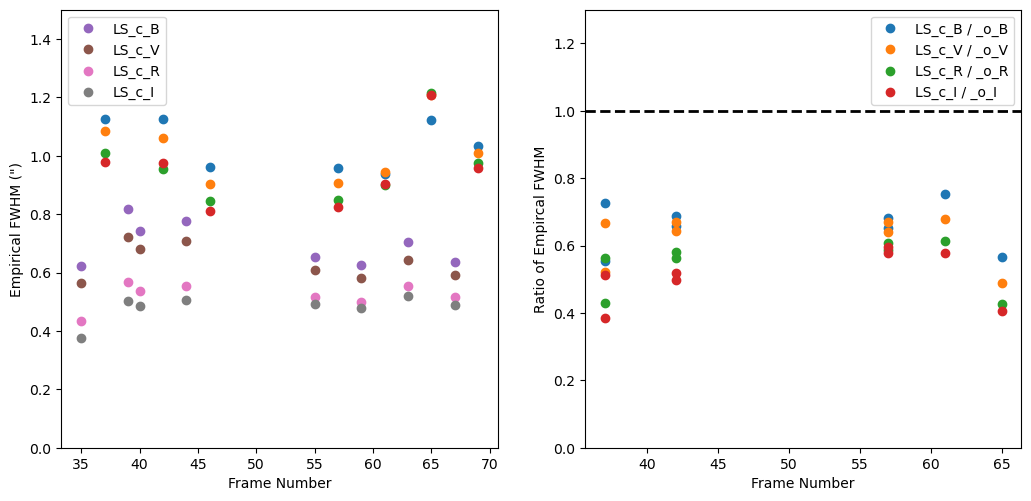

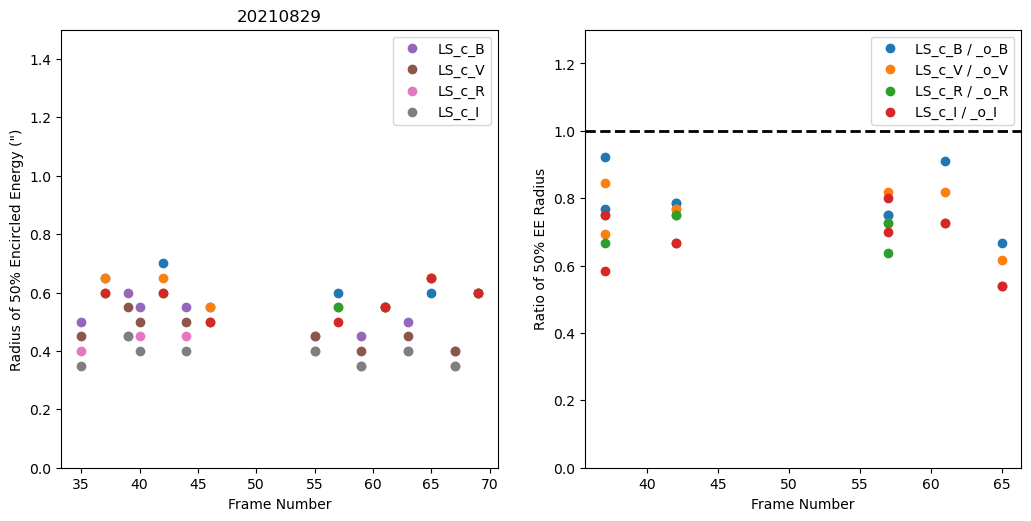

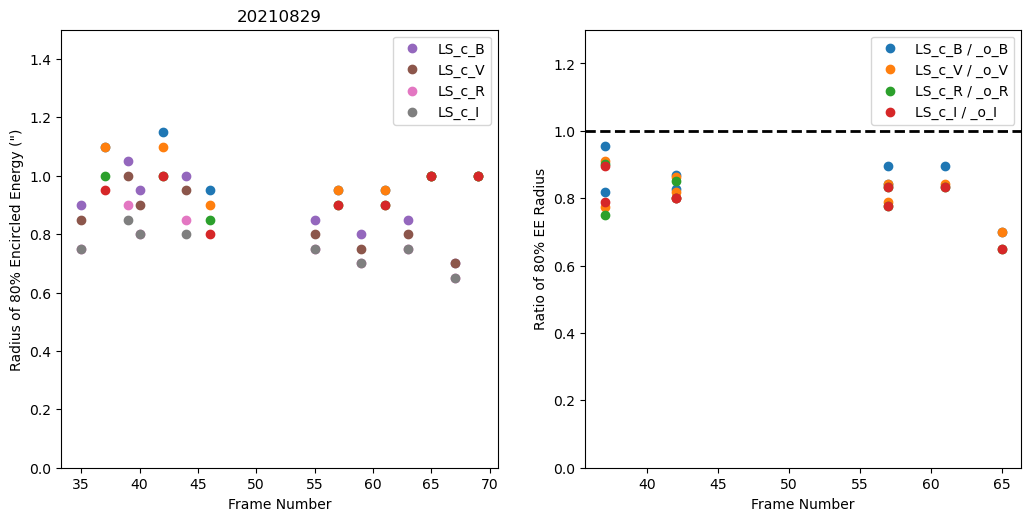

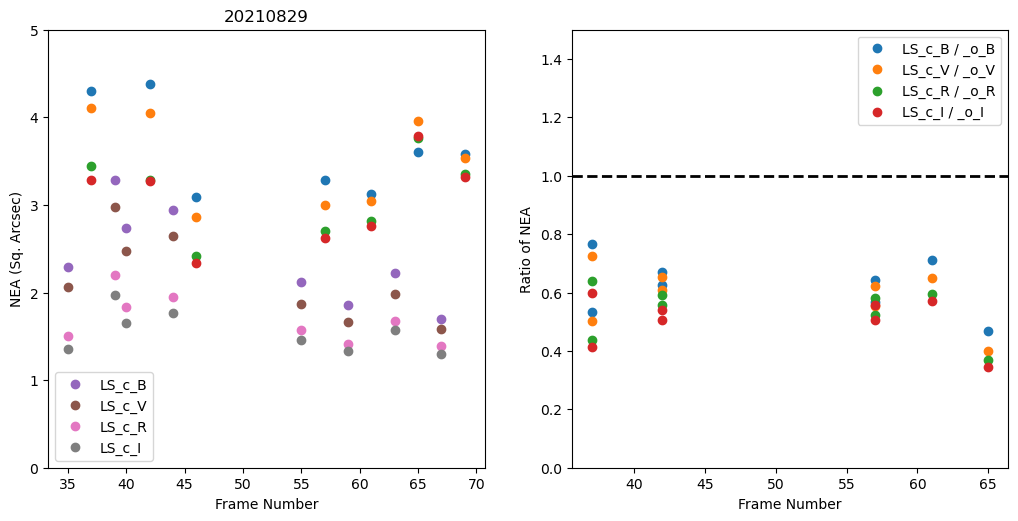

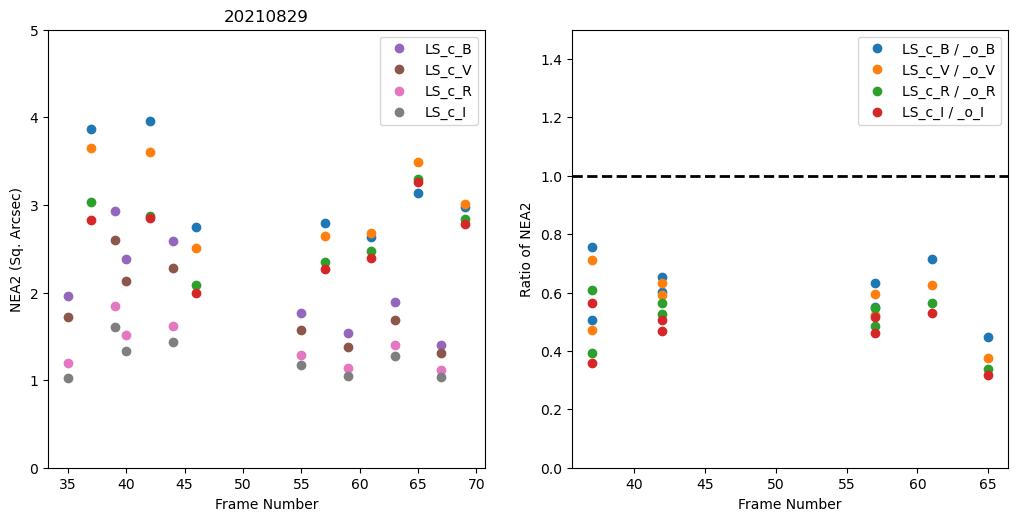

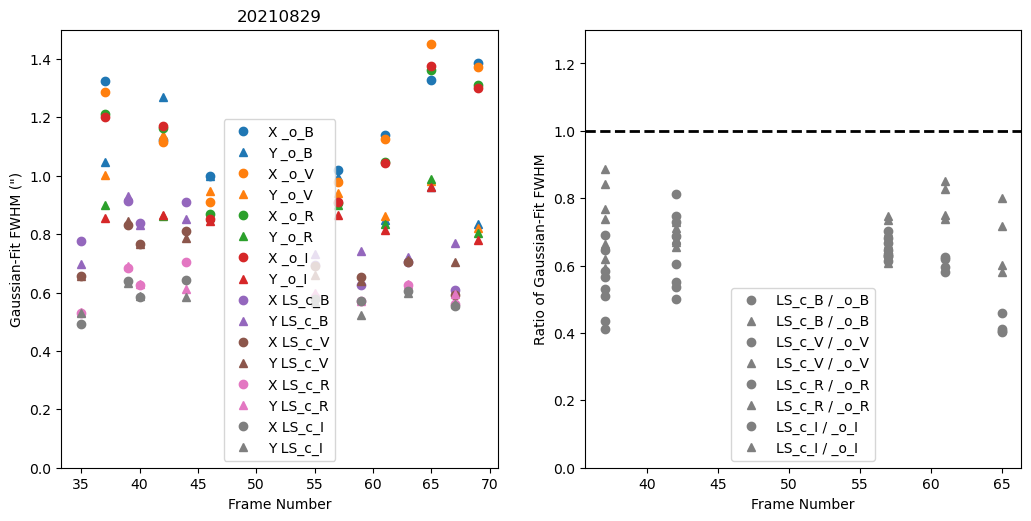

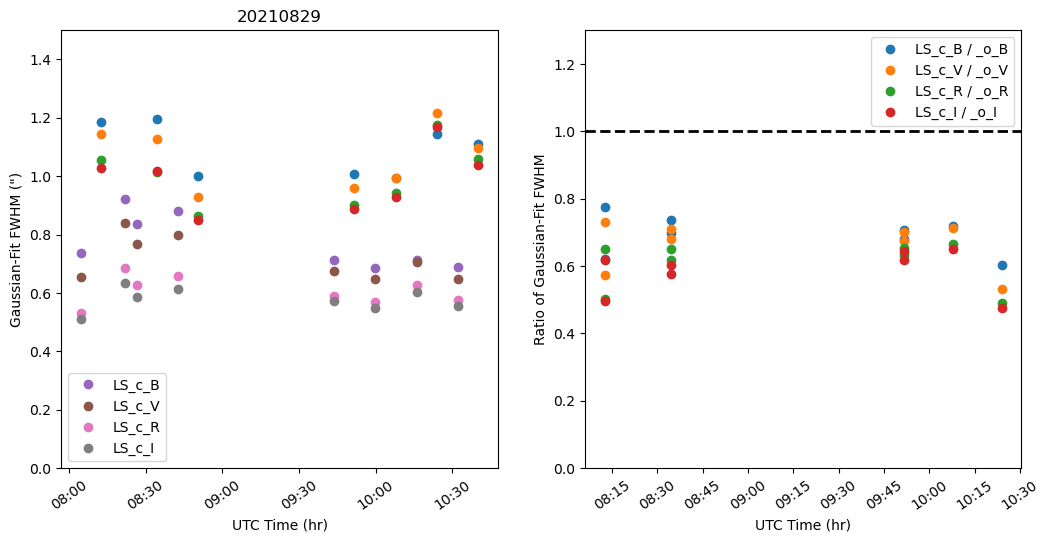

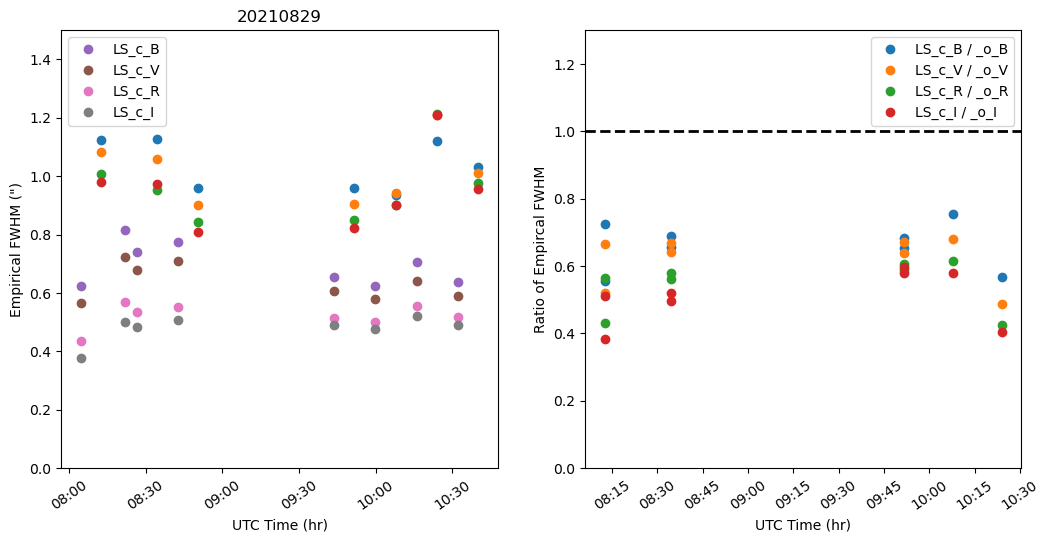

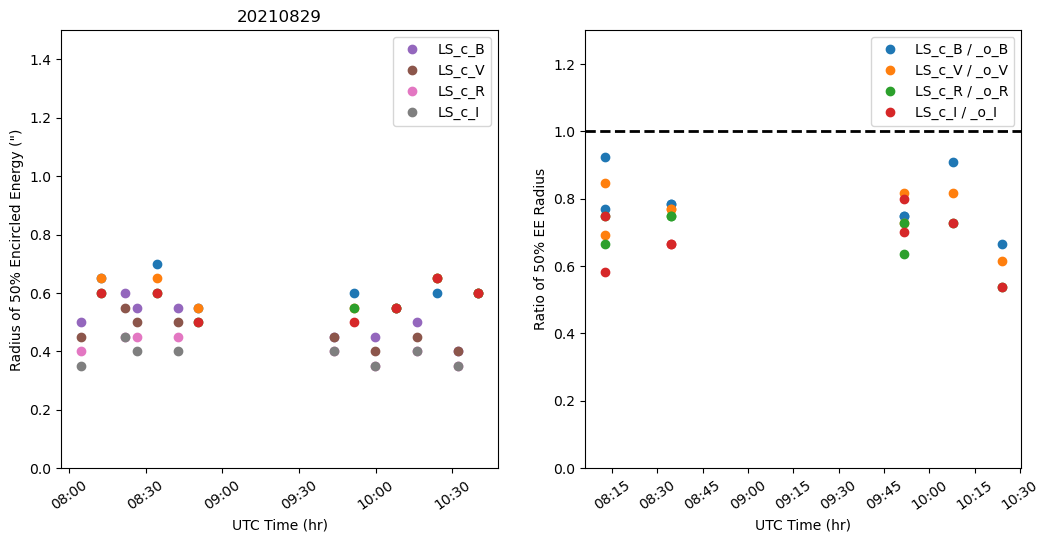

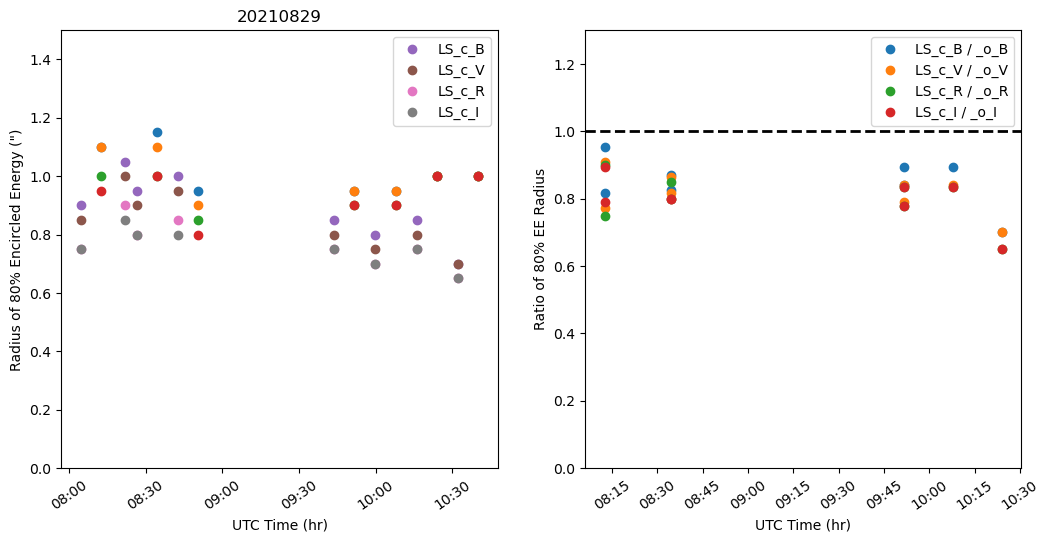

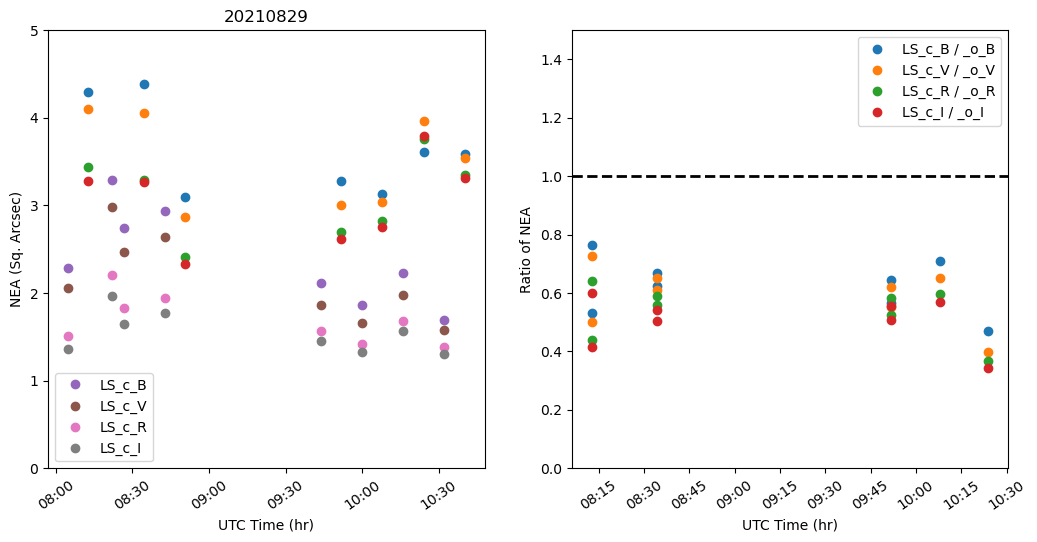

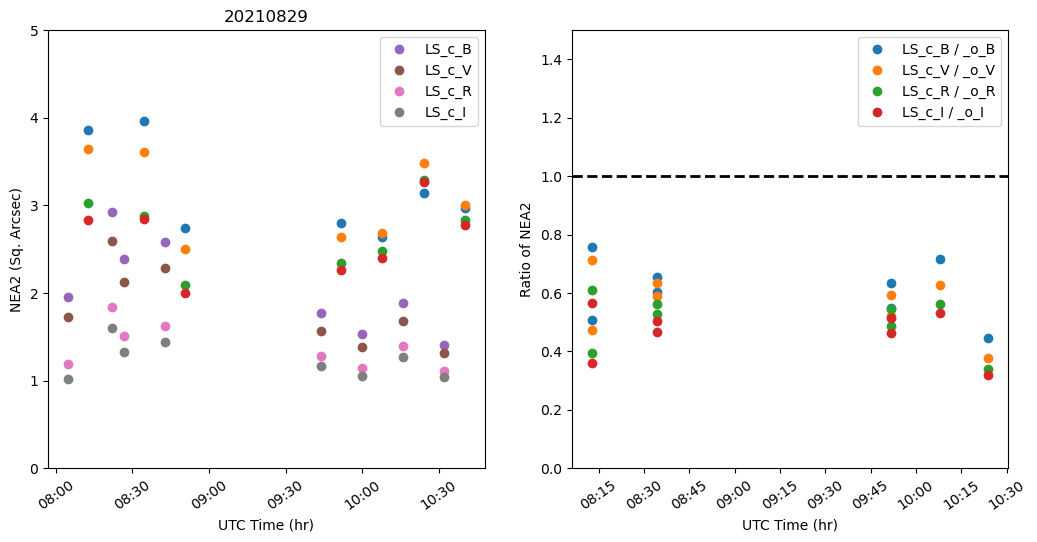

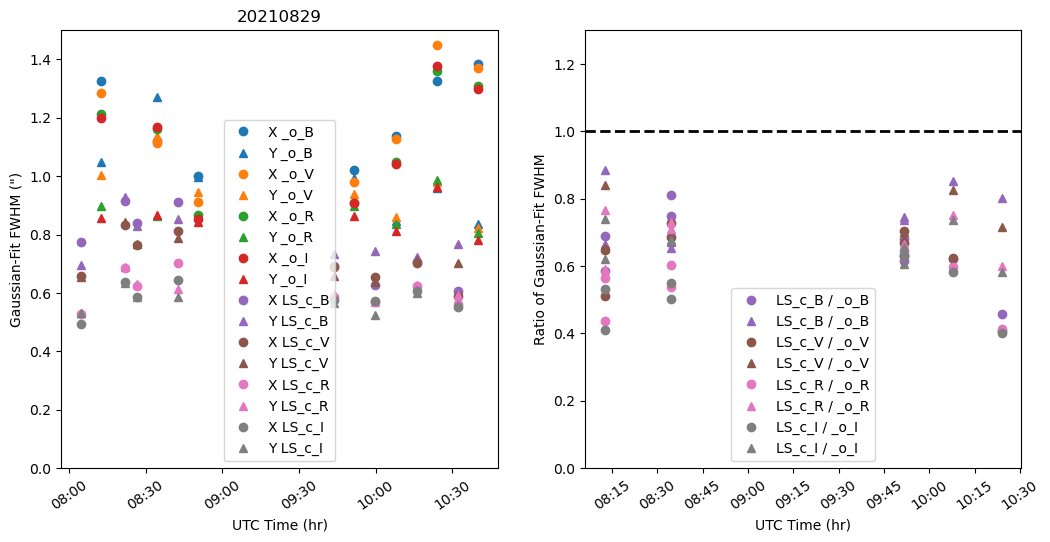

In [4]:
reload(plot_redu)
suffixes = ['_o', 'LS_c']
plot_redu.plot_stack_stats_4F(night, suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')
plt.show()

# Time Variation w/MASS-DIMM

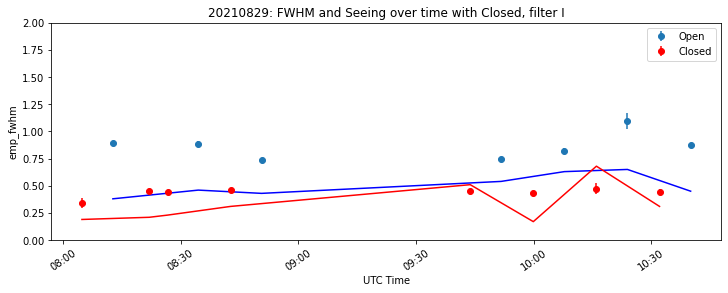

In [20]:
filt = "I"
wav = 806
open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

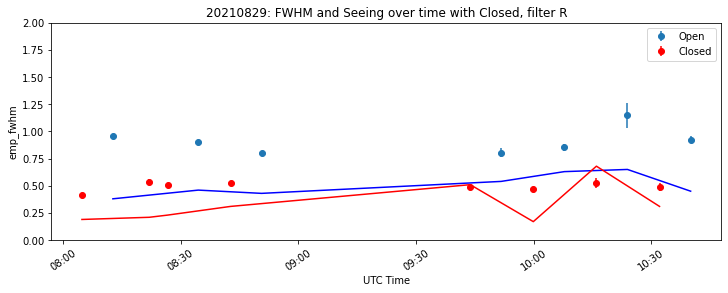

In [21]:
filt = "R"
wav = 658
open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

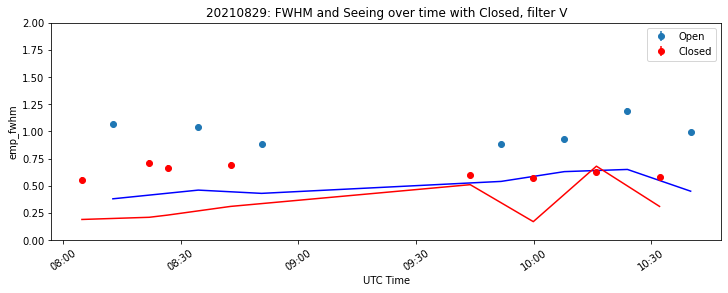

In [22]:
filt = "V"
wav = 551
open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

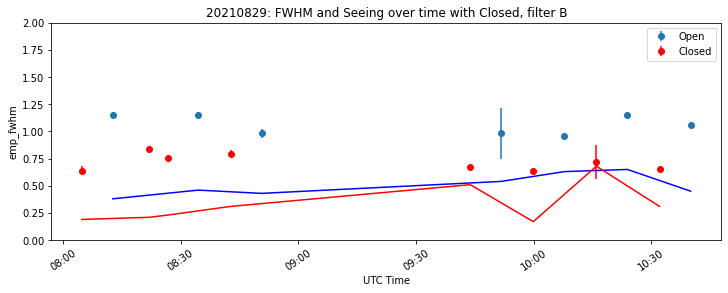

In [23]:
filt = "B"
wav = 445
open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

# Aggregate Plots

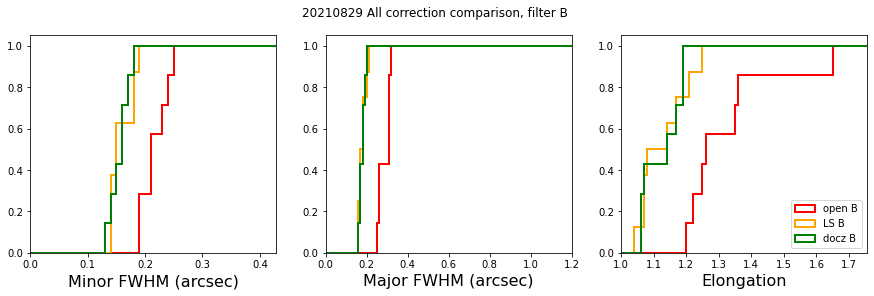

In [24]:
f_band = "B"

files = [f"{stats_dir}stats__o_{f_band}_mdp.fits", f"{stats_dir}stats_LS_c_{f_band}_mdp.fits", f"{stats_dir}stats_docz2_c_{f_band}_mdp.fits"]
labels = ['open '+ f_band, 'LS ' + f_band, 'docz ' + f_band]
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All correction comparison, filter {f_band}")
plt.show()

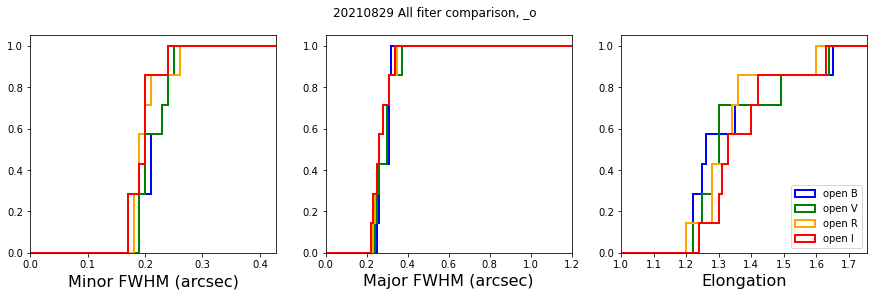

In [25]:
suff = "_o"

files = [f"{stats_dir}stats_{suff}_B_mdp.fits", f"{stats_dir}stats_{suff}_V_mdp.fits", f"{stats_dir}stats_{suff}_R_mdp.fits",f"{stats_dir}stats_{suff}_I_mdp.fits"]
labels = ['open B', 'open V', 'open R', 'open I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

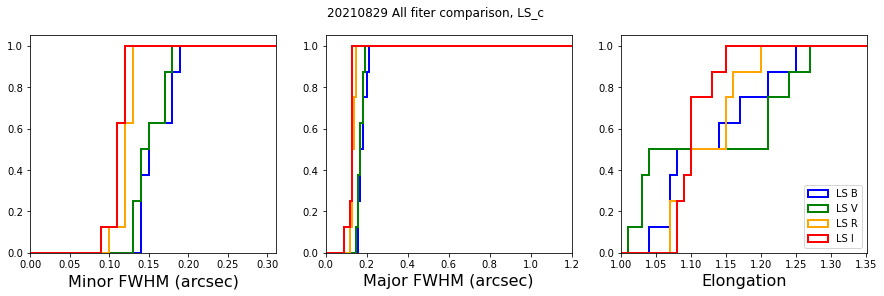

In [26]:
suff = "LS_c"

files = [f"{stats_dir}stats_{suff}_B_mdp.fits", f"{stats_dir}stats_{suff}_V_mdp.fits", f"{stats_dir}stats_{suff}_R_mdp.fits",f"{stats_dir}stats_{suff}_I_mdp.fits"]
labels = ['LS B', 'LS V', 'LS R', 'LS I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

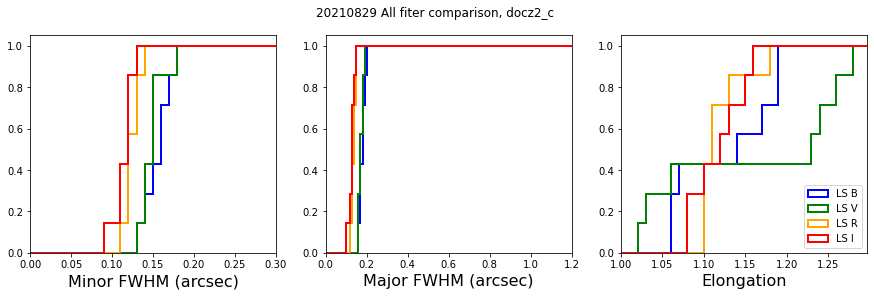

In [27]:
suff = "docz2_c"

files = [f"{stats_dir}stats_{suff}_B_mdp.fits", f"{stats_dir}stats_{suff}_V_mdp.fits", f"{stats_dir}stats_{suff}_R_mdp.fits",f"{stats_dir}stats_{suff}_I_mdp.fits"]
labels = ['LS B', 'LS V', 'LS R', 'LS I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

# Four Filter Analysis

In [28]:
from imaka.analysis import fourfilt
root = stats_dir

files_c = [root+"stats_LS_c_B.fits", root+"stats_LS_c_V.fits", root+"stats_LS_c_R.fits", root+"stats_LS_c_I.fits"]
files_o = [root+"stats__o_B.fits", root+"stats__o_V.fits", root+"stats__o_R.fits", root+"stats__o_I.fits"]

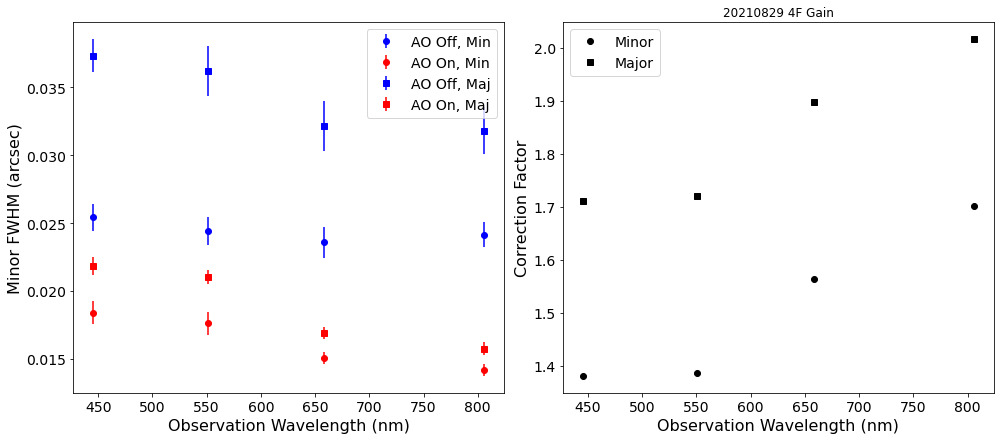

In [29]:
fourfilt.plot_gain(files_o, files_c) 
plt.title(f"{night} 4F Gain")
plt.show()

χ$^2$=0.6
χ$^2$=1.92
α=0.09
α=0.47


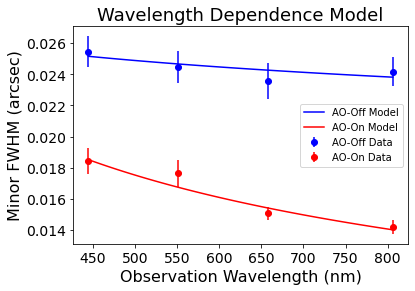

In [30]:
reload(fourfilt)
fourfilt.power_model(files_o, files_c)

# Field Variability

In [61]:
from importlib import reload
reload(plot_stats)

<module 'imaka.analysis.plot_stats' from '/u/eden/code/imaka/imaka/analysis/plot_stats.py'>

### Closed loop, single exposure

sta019LS_c_scan
Median FWHM           = 0.354"
Median FWHM (clipped) = 0.354"
Mean FWHM             = 0.364"
Mean FWHM (clipped)   = 0.355"
Stddev FWHM           = 0.204"
Stddev FWHM (clipped) = 0.019"


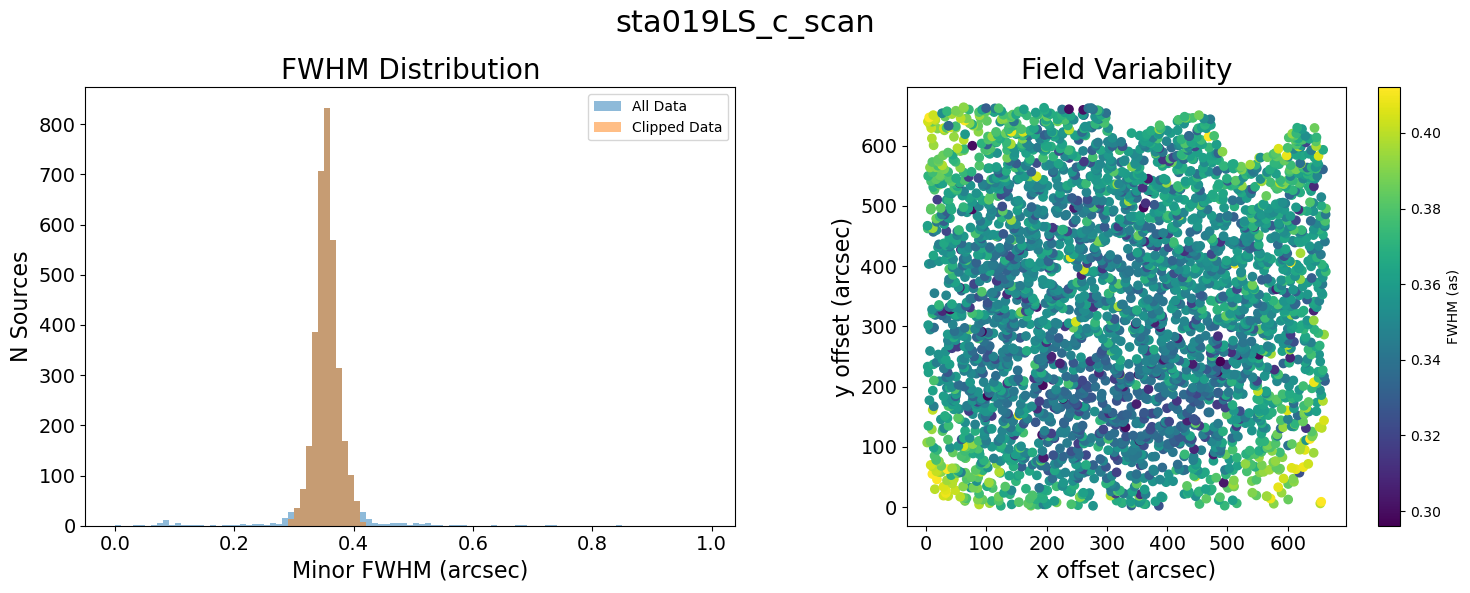

In [33]:
test_img_base = "sta019LS_c_scan"
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, test_img_base)

### Open Loop

Median FWHM           = 0.809"
Median FWHM (clipped) = 0.808"
Mean FWHM             = 0.820"
Mean FWHM (clipped)   = 0.805"
Stddev FWHM           = 0.329"
Stddev FWHM (clipped) = 0.049"


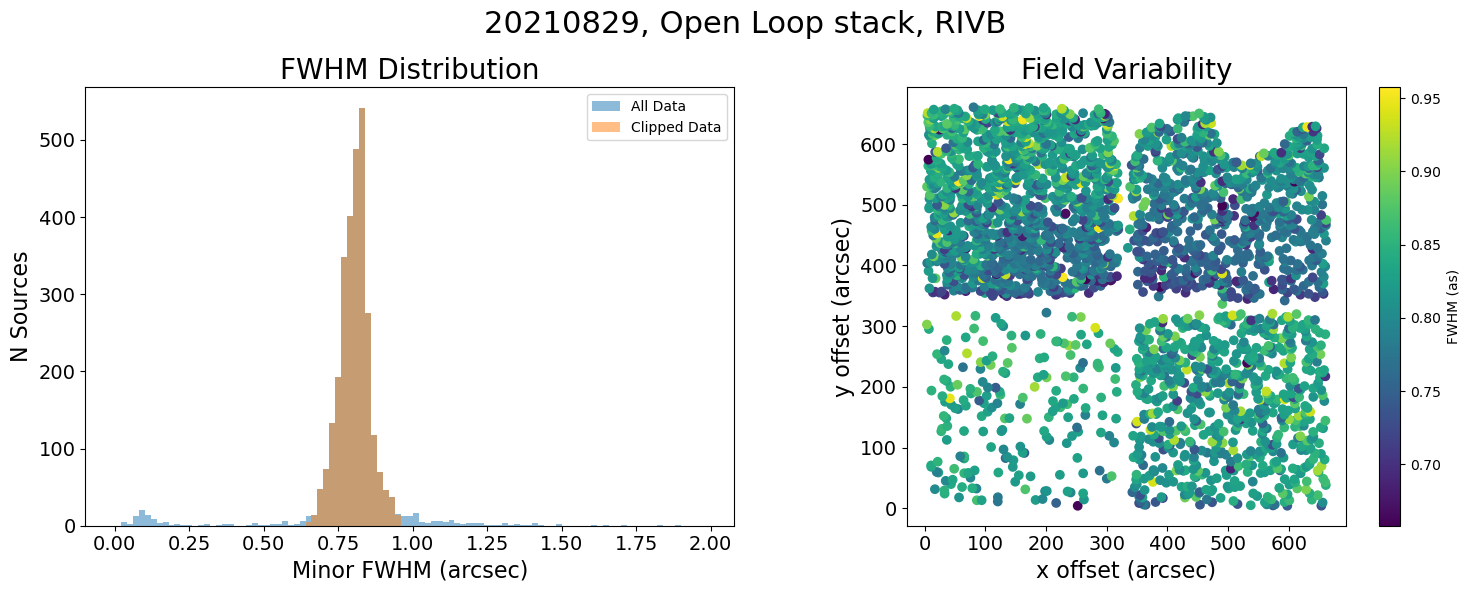

In [62]:
filt = 'RIVB'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop stack, {filt}")

Median FWHM           = 0.774"
Median FWHM (clipped) = 0.774"
Mean FWHM             = 0.784"
Mean FWHM (clipped)   = 0.785"
Stddev FWHM           = 0.218"
Stddev FWHM (clipped) = 0.063"


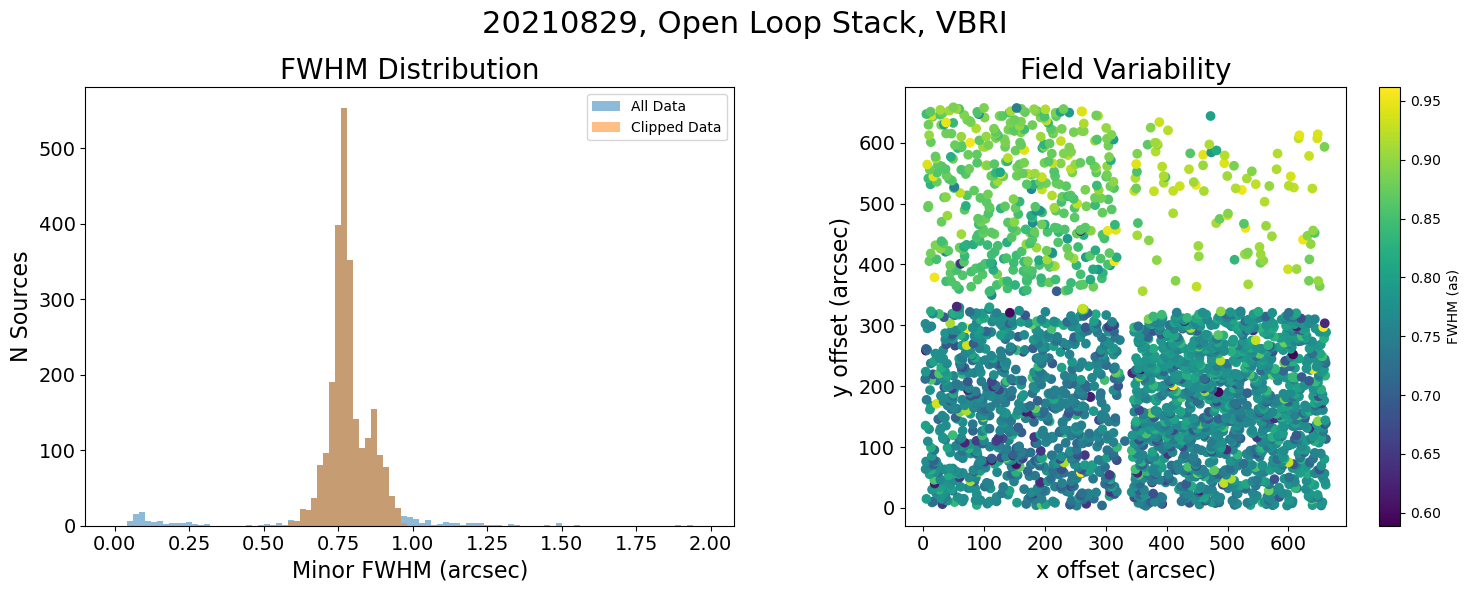

In [63]:
filt = 'VBRI' 
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop Stack, {filt}")

### Closed (LS)

Median FWHM           = 0.485"
Median FWHM (clipped) = 0.486"
Mean FWHM             = 0.500"
Mean FWHM (clipped)   = 0.490"
Stddev FWHM           = 0.297"
Stddev FWHM (clipped) = 0.050"


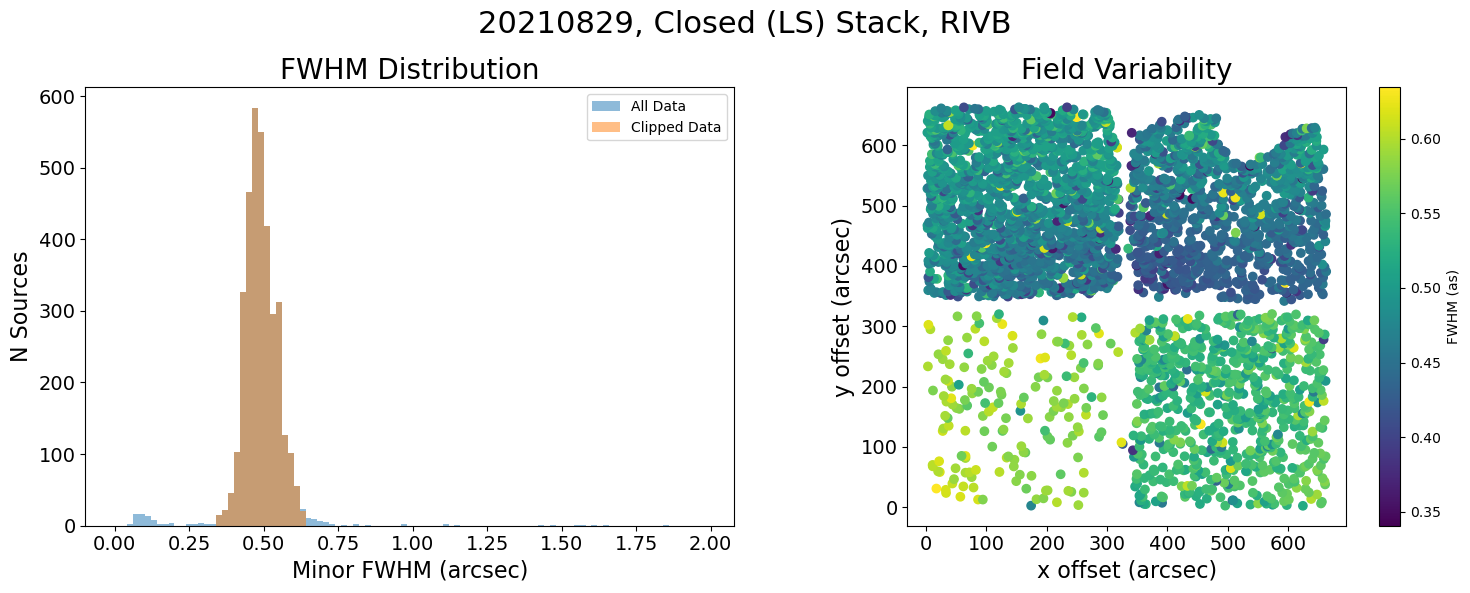

In [65]:
filt = 'RIVB'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (LS) Stack, {filt}")

Median FWHM           = 0.465"
Median FWHM (clipped) = 0.465"
Mean FWHM             = 0.493"
Mean FWHM (clipped)   = 0.481"
Stddev FWHM           = 0.269"
Stddev FWHM (clipped) = 0.076"


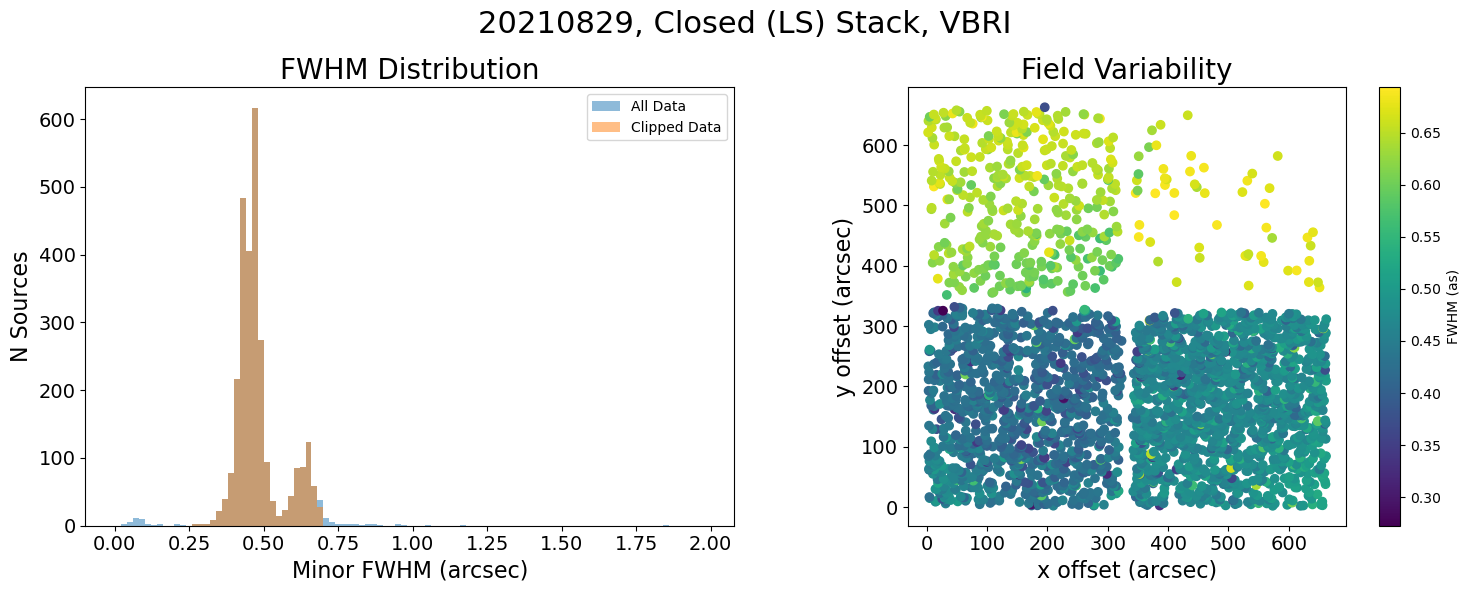

In [66]:
filt = 'VBRI'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (LS) Stack, {filt}")

### Closed (docz)

Median FWHM           = 0.502"
Median FWHM (clipped) = 0.503"
Mean FWHM             = 0.510"
Mean FWHM (clipped)   = 0.507"
Stddev FWHM           = 0.231"
Stddev FWHM (clipped) = 0.049"


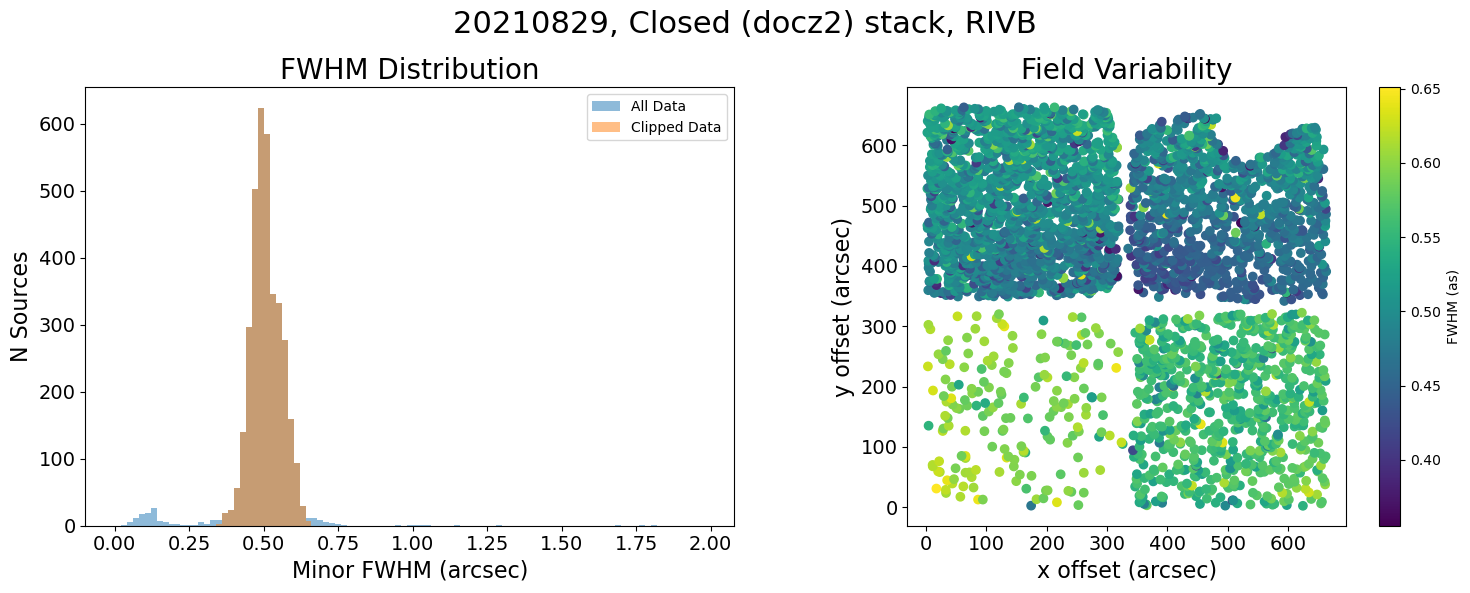

In [67]:
filt = 'RIVB'
img_file = stack_dir + f'fld2_stack_docz2_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_docz2_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (docz2) stack, {filt}")

Median FWHM           = 0.463"
Median FWHM (clipped) = 0.463"
Mean FWHM             = 0.486"
Mean FWHM (clipped)   = 0.478"
Stddev FWHM           = 0.257"
Stddev FWHM (clipped) = 0.075"


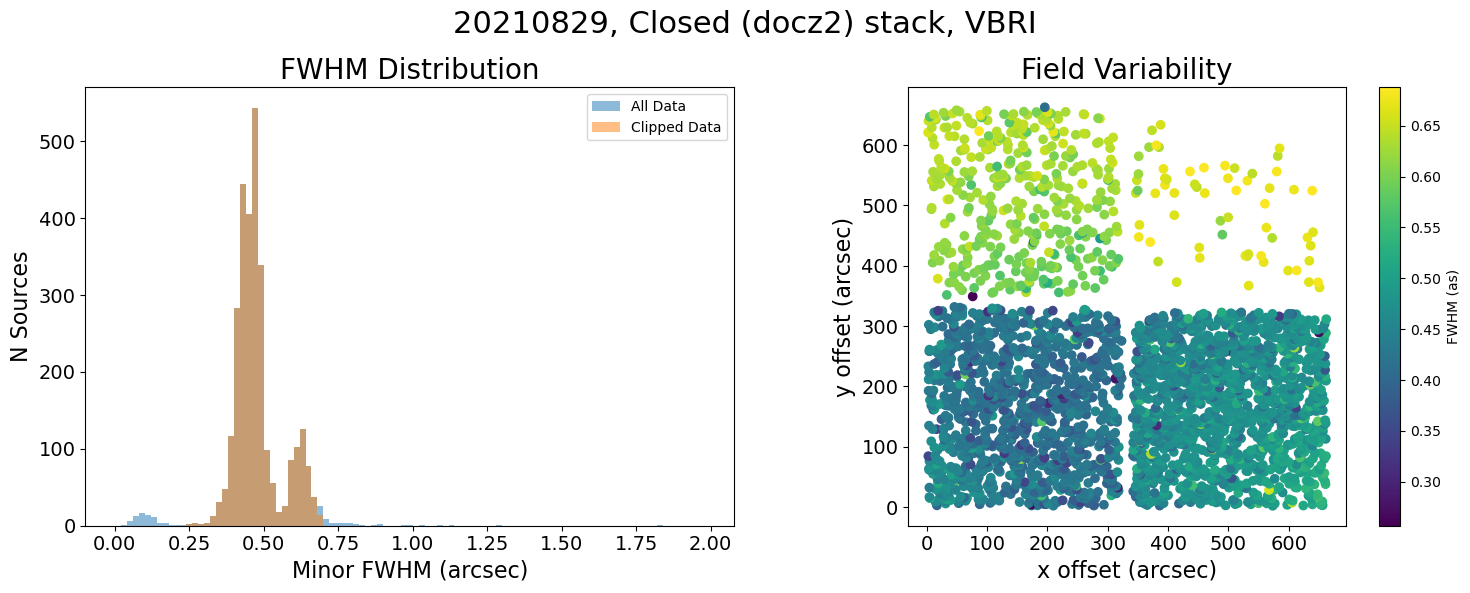

In [68]:
filt = 'VBRI'
img_file = stack_dir + f'fld2_stack_docz2_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_docz2_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (docz2) stack, {filt}")

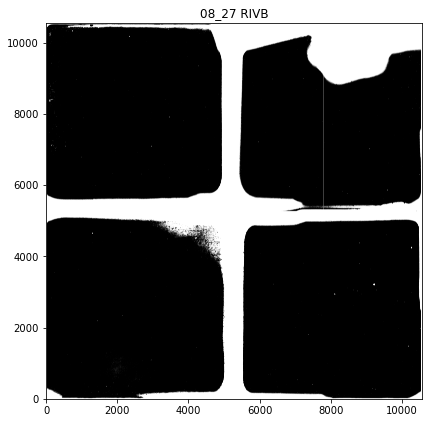

In [16]:
## What masks are we using? how are they different between orientations?
mask_dir = root_dir + "reduce/calib/"

hdul = fits.open(mask_dir +  "mask_RIVB.fits")

data = hdul[0].data

fig = plt.figure(figsize=(6,6))
plt.title("08_27 RIVB")
im = plt.imshow(data, origin ='lower', cmap='gray')
plt.tight_layout()
plt.show()
hdul.close()